# Analisis data pengangguran sakernas 2022-2024

## Persiapan data

In [2]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# file_path = 'data.xlsx'

# Membaca data
# data = pd.read_excel(file_path)
# data = pd.read_excel('data_combined_berlabel.xlsx')
data =pd.read_excel('data_combined_berlabel.xlsx')

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.max_rows', None)     # Menampilkan semua baris
pd.set_option('display.max_colwidth', None) # Menampilkan isi kolom tanpa batasan panjang

# Tampilkan beberapa baris pertama untuk melihat struktur dataset
data.head()


,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,2,5,5,7,1,55,2,3,2,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,1,3,3,2,2,29,2,3,2,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,1,5,5,8,1,41,4,3,2,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,1,4,4,2,2,51,2,3,2,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,1,3,3,2,2,38,2,3,2,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


## Mapping nilai pada kolom sesuai dengan kuesioner

In [3]:
# Mengubah kolom klasifikasi_desa_kota dari angka menjadi teks
data['klasifikasi_desa_kota'] = data['klasifikasi_desa_kota'].map({1: 'Kota', 2: 'Desa'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,7,1,55,2,3,2,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,2,2,29,2,3,2,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,8,1,41,4,3,2,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,2,2,51,2,3,2,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,2,2,38,2,3,2,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [4]:
# Mengubah kolom hubungan_dengan_krt dari angka menjadi teks
data['hubungan_dengan_krt'] = data['hubungan_dengan_krt'].map({1: 'Kepala Rumah Tangga', 2: 'Istri/Suami', 3: 'Anak Kandung', 4: 'Anak Tiri/Angkat', 5: 'Menantu', 6: 'Cucu', 7: 'Orang Tua/Mertua', 8: 'Famili Lain', 9: 'Pembantu Rumah Tangga', 10: 'Sopir/Tukang Kebun', 11: 'Lainnya'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,1,55,2,3,2,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,2,29,2,3,2,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,1,41,4,3,2,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,2,51,2,3,2,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,2,38,2,3,2,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [5]:
# Mengubah kolom jenis_kelamin dari angka menjadi teks
data['jenis_kelamin'] = data['jenis_kelamin'].map({1: 'Laki-laki', 2: 'Perempuan'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,2,3,2,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,2,3,2,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,4,3,2,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,2,3,2,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,2,3,2,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [6]:
# Mengubah kolom status_perkawinan dari angka menjadi teks
data['status_perkawinan'] = data['status_perkawinan'].map({1: 'Belum Kawin', 2: 'Kawin', 3: 'Cerai Hidup', 4: 'Cerai Mati'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,3,2,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,3,2,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,3,2,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,3,2,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,3,2,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [7]:
# Mengubah kolom partisipasi_sekolah dari angka menjadi teks
data['partisipasi_sekolah'] = data['partisipasi_sekolah'].map({1: 'Belum Bersekolah', 2: 'Masih Bersekolah', 3: 'Tidak Bersekolah Lagi'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,2,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,2,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,2,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,2,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,2,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [8]:
# Mengubah kolom pendidikan_tertinggi dari angka menjadi teks
# Kategori SMA/MA/SMLB/Paket C, SMK, dan MAK digabung menjadi SMA/SMK/MA/MAK/SMLB/Paket C
# Kategori Diploma I/II/II diubah menjadi D1/D2/D3
# Kategori Diploma IV dan S1 digabung menjadi D4/S1
# Kategori S2 dan S2 Terapan digabung menjadi S2/S2 Terapan
data['pendidikan_tertinggi'] = data['pendidikan_tertinggi'].map({1: 'Tidak/Belum Tamat SD', 2: 'SD/MI/SDLB/Paket A', 3: 'SMP/MTs/SMPLB/Paket B', 4: 'SMA/SMK/MA/MAK/SMLB/Paket C', 5: 'SMA/SMK/MA/MAK/SMLB/Paket C', 6: 'SMA/SMK/MA/MAK/SMLB/Paket C', 7: 'D1/D2/D3', 8: 'D4/S1', 9: 'D4/S1', 10: 'S2/S2 Terapan', 11: 'S2/S2 Terapan', 12: 'S3'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,0,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,0,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,0,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,0,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,0,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [9]:
# Mengubah kolom penyelenggara_pendidikan dari angka menjadi teks
data['penyelenggara_pendidikan'] = data['penyelenggara_pendidikan'].map({0: '-', 1: 'Negeri', 2: 'Swasta', 3: 'Kedinasan', 4: 'Tidak Tahu'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,2,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,2,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,2,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,2,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [10]:
# Mengubah kolom pernah_pelatihan dari angka menjadi teks
data['pernah_pelatihan'] = data['pernah_pelatihan'].map({1: 'Ya', 2: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,0,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,0,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,0,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,0,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [11]:
# Mengubah kolom sertifikat_pelatihan dari angka menjadi teks
data['sertifikat_pelatihan'] = data['sertifikat_pelatihan'].map({0: '-', 1: 'Ya', 2: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,4,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,4,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,4,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,4,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [12]:
# Mengubah kolom disabilitas_penglihatan dari angka menjadi teks
data['disabilitas_penglihatan'] = data['disabilitas_penglihatan'].map({1: 'Ya, sama sekali tidak bisa melihat', 2: 'Ya, banyak kesulitan', 3: 'Ya, sedikit kesulitan', 4: 'Tidak mengalami kesulitan'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,8,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,8,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,8,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,8,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [13]:
# Mengubah kolom disabilitas_pendengaran dari angka menjadi teks
data['disabilitas_pendengaran'] = data['disabilitas_pendengaran'].map({5: 'Ya, sama sekali tidak bisa mendengar', 6: 'Ya, banyak kesulitan', 7: 'Ya, sedikit kesulitan', 8: 'Tidak mengalami kesulitan'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,8,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,8,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,8,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,8,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [14]:
# Mengubah kolom disabilitas_tangan dari angka menjadi teks
data['disabilitas_tangan'] = data['disabilitas_tangan'].map({5: 'Ya, sama sekali tidak bisa menggunakan/menggerakkan tangan/jari', 6: 'Ya, banyak kesulitan', 7: 'Ya, sedikit kesulitan', 8: 'Tidak mengalami kesulitan'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,4,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,4,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,4,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,4,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,4,0,0,0,3,0,2,0,0,PENGANGGURAN


In [15]:
# Mengubah kolom disabilitas_komunikasi dari angka menjadi teks
data['disabilitas_komunikasi'] = data['disabilitas_komunikasi'].map({1: 'Ya, sama sekali tidak bisa memahami/dipahami/berkomunikasi', 2: 'Ya, banyak kesulitan', 3: 'Ya, sedikit kesulitan', 4: 'Tidak mengalami kesulitan'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,0,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,0,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,0,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,0,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,0,0,0,3,0,2,0,0,PENGANGGURAN


In [16]:
# Mengubah kolom utama_pc dari angka menjadi teks
data['utama_pc'] = data['utama_pc'].map({0: '-', 1: 'Ya', 2: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,0,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,0,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,0,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,0,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,0,0,3,0,2,0,0,PENGANGGURAN


In [17]:
# Mengubah kolom utama_hp dari angka menjadi teks
data['utama_hp'] = data['utama_hp'].map({0: '-', 3: 'Ya', 4: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,0,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,0,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,0,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,0,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,0,3,0,2,0,0,PENGANGGURAN


In [18]:
# Mengubah kolom utama_teknologi_lain dari angka menjadi teks
data['utama_teknologi_lain'] = data['utama_teknologi_lain'].map({0: '-', 1: 'Ya', 2: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,3,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,0,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,3,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,3,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,3,0,2,0,0,PENGANGGURAN


In [19]:
# Mengubah kolom alasan_tidak_cari_kerja_minggu dari angka menjadi teks
data['alasan_tidak_cari_kerja_minggu'] = data['alasan_tidak_cari_kerja_minggu'].map({0: '-', 1: 'Sudah diterima bekerja tapi belum mulai bekerja', 2: 'Sudah mempunyai usaha tapi belum memulainya', 3: 'Putus asa', 4: 'Sudah mempunyai pekerjaan/usaha', 5: 'Melakukan kegiatan lain (mengurus rumah tangga/sekolah)', 6: 'Kurangnya infrastruktur (aset, jalan, transportasi layanan ketenagakerjaan) atau tidak ada modal', 7: 'Tidak mampu melakukan pekerjaan', 8: 'Lainnya'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,0,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,1,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,0,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,0,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,0,2,0,0,PENGANGGURAN


In [20]:
# Mengubah kolom terdaftar_pekerja dari angka menjadi teks
data['terdaftar_prakerja'] = data['terdaftar_prakerja'].map({1: 'Ya', 2: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,1,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,Ya,1,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,1,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,1,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,2,0,0,PENGANGGURAN


In [21]:
# Mengubah kolom kerja sebelumnya dari angka menjadi teks
data['kerja_sebelumnya'] = data['kerja_sebelumnya'].map({1: 'Ya', 2: 'Tidak'})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,0,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,Ya,Ya,1,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,5,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,0,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Tidak,0,0,PENGANGGURAN


In [22]:
# Mengubah kolom status_kerja sebelumnya dari angka menjadi teks
data['status_kerja'] = data['status_kerja'].map({
    1: 'Berusaha sendiri',
    2: 'Berusaha dibantu pekerja tidak tetap/pekerja keluarga/tidak dibayar',
    3: 'Berusaha dibantu pekerja tetap dan dibayar',
    4: 'Buruh/karyawan/pegawai',
    5: 'Pekerja bebas di pertanian',
    6: 'Pekerja bebas di nonpertanian',
    7: 'Pekerja keluarga/tidak dibayar'
})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,NaN,0,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,Ya,Ya,Berusaha sendiri,2,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,Pekerja bebas di pertanian,5,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,NaN,0,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Tidak,NaN,0,PENGANGGURAN


In [23]:
# Map numeric values to 'alasan_berhenti_kerja' categories
data['alasan_berhenti_kerja'] = data['alasan_berhenti_kerja'].map({
    1: 'PHK',
    2: 'Usaha berhenti/bangkrut',
    3: 'Pendapatan kurang memuaskan',
    4: 'Tidak cocok dengan lingkungan kerja',
    5: 'Habis masa kerja/kontrak',
    6: 'Mengurus rumah tangga',
    7: 'Lainnya'
})

# Menampilkan beberapa baris pertama untuk memastikan perubahan
data.head()

,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,NaN,NaN,PENGANGGURAN
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,Ya,Ya,Berusaha sendiri,Usaha berhenti/bangkrut,PENGANGGURAN
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,Pekerja bebas di pertanian,Habis masa kerja/kontrak,PENGANGGURAN
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,NaN,NaN,PENGANGGURAN
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Tidak,NaN,NaN,PENGANGGURAN


## Pemrosesan Data

In [24]:
# Cek nilai kosong
missing_values = data.isnull().sum()
print("Jumlah nilai kosong per kolom:")
print(missing_values)


Jumlah nilai kosong per kolom:
tahun                               0
penimbang                           0
klasifikasi_desa_kota               0
jml_art                             0
jml_art_5th_keatas                  0
hubungan_dengan_krt                 0
jenis_kelamin                       0
umur                                0
status_perkawinan                   0
partisipasi_sekolah                 0
pendidikan_tertinggi                0
penyelenggara_pendidikan            0
tahun_lulus_pendidikan              0
pernah_pelatihan                    0
sertifikat_pelatihan                0
disabilitas_penglihatan             0
disabilitas_pendengaran             0
disabilitas_tangan                  0
disabilitas_komunikasi              0
utama_pc                            0
utama_hp                            0
utama_teknologi_lain                0
alasan_tidak_cari_kerja_minggu      0
terdaftar_prakerja                151
kerja_sebelumnya                    0
status_kerja       

In [25]:
# Mengubah umur dan tahun_lulus_pendidikan ke dalam kelompok

In [26]:
# Mengelompokkan umur berdasarkan generasi, rentang tahun, dan kategori umur
# Menentukan generasi berdasarkan umur dan tahun data diambil
def assign_generation(row):
    # Tahun data diambil
    current_year = row['tahun']

    # Menghitung umur berdasarkan tahun data diambil
    age_at_data_year = row['umur']

    # Menentukan generasi berdasarkan umur dan tahun
    if current_year == 2022:
        # Generasi berdasarkan umur pada tahun 2022
        if age_at_data_year <= 9:
            return 'Generasi Alpha'
        elif 10 <= age_at_data_year <= 25:
            return 'Generasi Z'
        elif 26 <= age_at_data_year <= 41:
            return 'Milenial'
        elif 42 <= age_at_data_year <= 57:
            return 'Generasi X'
        elif 58 <= age_at_data_year <= 76:
            return 'Baby Boomers'
        else:
            return 'Silent Generation'
    elif current_year == 2023:
        # Generasi berdasarkan umur pada tahun 2023
        if age_at_data_year <= 10:
            return 'Generasi Alpha'
        elif 11 <= age_at_data_year <= 26:
            return 'Generasi Z'
        elif 27 <= age_at_data_year <= 42:
            return 'Milenial'
        elif 43 <= age_at_data_year <= 58:
            return 'Generasi X'
        elif 59 <= age_at_data_year <= 77:
            return 'Baby Boomers'
        else:
            return 'Silent Generation'
    elif current_year == 2024:
        # Generasi berdasarkan umur pada tahun 2024
        if age_at_data_year <= 11:
            return 'Generasi Alpha'
        elif 12 <= age_at_data_year <= 27:
            return 'Generasi Z'
        elif 28 <= age_at_data_year <= 43:
            return 'Milenial'
        elif 44 <= age_at_data_year <= 59:
            return 'Generasi X'
        elif 60 <= age_at_data_year <= 78:
            return 'Baby Boomers'
        else:
            return 'Silent Generation'

# Menambahkan kolom 'generasi' berdasarkan umur dan tahun data diambil
data['generasi'] = data.apply(assign_generation, axis=1)

# Kelompokkan dalam rentang umur 5 tahunan
bins_5_years = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
labels_5_years = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+']
data['kelompok_5_tahun'] = pd.cut(data['umur'], bins=bins_5_years, labels=labels_5_years, right=False)

# Kelompokkan dalam kategori umur (Anak-anak, Dewasa Muda, Dewasa, Lansia)
bins_age_category = [0, 18, 36, 56, 100]
labels_age_category = ['Anak-anak', 'Dewasa Muda', 'Dewasa', 'Lansia']
data['kategori_umur'] = pd.cut(data['umur'], bins=bins_age_category, labels=labels_age_category, right=False)

# Hapus kolom 'umur' yang lama
# data = data.drop(columns=['umur'])

# Menampilkan data untuk memastikan perubahan
data.head()


,tahun,penimbang,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,umur,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,tahun_lulus_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran,generasi,kelompok_5_tahun,kategori_umur
0,2022,9,Desa,5,5,Orang Tua/Mertua,Laki-laki,55,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1979,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,NaN,NaN,PENGANGGURAN,Generasi X,55-59,Dewasa
1,2022,202,Kota,3,3,Istri/Suami,Perempuan,29,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,2004,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,Ya,Ya,Berusaha sendiri,Usaha berhenti/bangkrut,PENGANGGURAN,Milenial,25-29,Dewasa Muda
2,2022,130,Kota,5,5,Famili Lain,Laki-laki,41,Cerai Mati,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1994,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,Pekerja bebas di pertanian,Habis masa kerja/kontrak,PENGANGGURAN,Milenial,40-44,Dewasa
3,2022,98,Kota,4,4,Istri/Suami,Perempuan,51,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1984,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Ya,NaN,NaN,PENGANGGURAN,Generasi X,50-54,Dewasa
4,2022,87,Kota,3,3,Istri/Suami,Perempuan,38,Kawin,Tidak Bersekolah Lagi,SD/MI/SDLB/Paket A,-,1996,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,Putus asa,NaN,Tidak,NaN,NaN,PENGANGGURAN,Milenial,35-39,Dewasa


In [27]:
# Menambahkan kolom baru untuk tahun lulus pendidikan SD, SMP, SMA, dll.
def assign_graduation_year(education, graduation_year):
    if education == 'Tidak/Belum Tamat SD':
        return '-'  # Jika belum tamat SD, beri tanda "-"
    elif education == 'SD/MI/SDLB/Paket A':
        return graduation_year
    elif education == 'SMP/MTs/SMPLB/Paket B':
        return graduation_year
    elif education == 'SMA/SMK/MA/MAK/SMLB/Paket C':
        return graduation_year
    elif education == 'D1/D2/D3':
        return graduation_year
    elif education == 'D4/S1':
        return graduation_year
    elif education == 'S2/S2 Terapan':
        return graduation_year
    elif education == 'S3':
        return graduation_year
    else:
        return '-'

# Menerapkan fungsi ke kolom pendidikan tertinggi untuk setiap jenjang pendidikan
data['tahun_lulus_sd_sederajat'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'SD/MI/SDLB/Paket A' in row['pendidikan_tertinggi'] else '-', axis=1)
data['tahun_lulus_smp_sederajat'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'SMP/MTs/SMPLB/Paket B' in row['pendidikan_tertinggi'] else '-', axis=1)
data['tahun_lulus_sma_sederajat'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'SMA/SMK/MA/MAK/SMLB/Paket C' in row['pendidikan_tertinggi'] else '-', axis=1)
data['tahun_lulus_d1_d2_d3'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'D1/D2/D3' in row['pendidikan_tertinggi'] else '-', axis=1)
data['tahun_lulus_d4_s1'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'D4/S1' in row['pendidikan_tertinggi'] else '-', axis=1)
data['tahun_lulus_s2_s2_terapan'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'S2/S2 Terapan' in row['pendidikan_tertinggi'] else '-', axis=1)
data['tahun_lulus_s3'] = data.apply(lambda row: assign_graduation_year(row['pendidikan_tertinggi'], row['tahun_lulus_pendidikan']) if 'S3' in row['pendidikan_tertinggi'] else '-', axis=1)


In [28]:
# Memeriksa tipe data tiap kolom
print(data.dtypes)

tahun                                int64
penimbang                            int64
klasifikasi_desa_kota               object
jml_art                              int64
jml_art_5th_keatas                   int64
hubungan_dengan_krt                 object
jenis_kelamin                       object
umur                                 int64
status_perkawinan                   object
partisipasi_sekolah                 object
pendidikan_tertinggi                object
penyelenggara_pendidikan            object
tahun_lulus_pendidikan               int64
pernah_pelatihan                    object
sertifikat_pelatihan                object
disabilitas_penglihatan             object
disabilitas_pendengaran             object
disabilitas_tangan                  object
disabilitas_komunikasi              object
utama_pc                            object
utama_hp                            object
utama_teknologi_lain                object
alasan_tidak_cari_kerja_minggu      object
terdaftar_p

In [29]:
# Mengonversi beberapa kolom agar tetap bertipe data kategorikal
data['jml_art'] = data['jml_art'].astype('object')
data['jml_art_5th_keatas'] = data['jml_art_5th_keatas'].astype('object')
data['kelompok_5_tahun'] = data['kelompok_5_tahun'].astype('object')
data['kategori_umur'] = data['kategori_umur'].astype('object')


In [30]:
# Memeriksa tipe data tiap kolom
print(data.dtypes)

tahun                              int64
penimbang                          int64
klasifikasi_desa_kota             object
jml_art                           object
jml_art_5th_keatas                object
hubungan_dengan_krt               object
jenis_kelamin                     object
umur                               int64
status_perkawinan                 object
partisipasi_sekolah               object
pendidikan_tertinggi              object
penyelenggara_pendidikan          object
tahun_lulus_pendidikan             int64
pernah_pelatihan                  object
sertifikat_pelatihan              object
disabilitas_penglihatan           object
disabilitas_pendengaran           object
disabilitas_tangan                object
disabilitas_komunikasi            object
utama_pc                          object
utama_hp                          object
utama_teknologi_lain              object
alasan_tidak_cari_kerja_minggu    object
terdaftar_prakerja                object
kerja_sebelumnya

In [31]:
# Deskripsi statistik untuk kolom numerik
data.describe()


,tahun,penimbang,umur,tahun_lulus_pendidikan
count,160.000000,160.000000,160.000000,160.000000
mean,2022.756250,131.206250,34.193750,1893.106250
std,0.783051,52.988322,15.769366,463.920301
min,2022.000000,3.000000,15.000000,0.000000
25%,2022.000000,106.000000,21.750000,1991.000000
50%,2023.000000,134.500000,29.000000,2010.000000
75%,2023.000000,162.000000,42.000000,2019.000000
max,2024.000000,259.000000,83.000000,2024.000000


In [32]:
# Deskripsi statistik untuk kolom kategorikal
data.describe(include=['object'])


,klasifikasi_desa_kota,jml_art,jml_art_5th_keatas,hubungan_dengan_krt,jenis_kelamin,status_perkawinan,partisipasi_sekolah,pendidikan_tertinggi,penyelenggara_pendidikan,pernah_pelatihan,sertifikat_pelatihan,disabilitas_penglihatan,disabilitas_pendengaran,disabilitas_tangan,disabilitas_komunikasi,utama_pc,utama_hp,utama_teknologi_lain,alasan_tidak_cari_kerja_minggu,terdaftar_prakerja,kerja_sebelumnya,status_kerja,alasan_berhenti_kerja,Pengangguran,generasi,kelompok_5_tahun,kategori_umur,tahun_lulus_sd_sederajat,tahun_lulus_smp_sederajat,tahun_lulus_sma_sederajat,tahun_lulus_d1_d2_d3,tahun_lulus_d4_s1,tahun_lulus_s2_s2_terapan,tahun_lulus_s3
count,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,9,160,53,48,160,160,160,160,160,160,160,160,160,160,160
unique,2,9,8,8,2,4,2,7,3,2,3,2,2,1,2,3,3,3,2,2,2,5,7,1,5,12,4,29,20,24,4,7,2,1
top,Kota,4,4,Anak Kandung,Laki-laki,Belum Kawin,Tidak Bersekolah Lagi,SMA/SMK/MA/MAK/SMLB/Paket C,-,Tidak,-,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,Tidak mengalami kesulitan,-,-,-,-,Ya,Ya,Buruh/karyawan/pegawai,Habis masa kerja/kontrak,PENGANGGURAN,Generasi Z,20-24,Dewasa Muda,-,-,-,-,-,-,-
freq,146,52,59,84,96,88,146,70,79,130,130,159,158,160,159,126,126,126,85,5,109,22,29,160,71,36,98,115,135,90,157,153,159,160


In [33]:
# Pilih kolom numerik untuk dihitung rata-rata tertimbangnya
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Menghitung rata-rata tertimbang untuk seluruh data
weighted_avg_all = (data[numeric_columns].multiply(data['penimbang'], axis=0)).sum() / data['penimbang'].sum()

# Menampilkan hasil rata-rata tertimbang untuk seluruh data
print(weighted_avg_all)


tahun                     2022.737627
penimbang                  152.472110
umur                        34.121326
tahun_lulus_pendidikan    1880.923641
dtype: float64


## Visualisasi Data

### Distribusi Desa/Kota

/tmp/ipython-input-651056540.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_desa_kota_weighted = data.groupby('klasifikasi_desa_kota').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


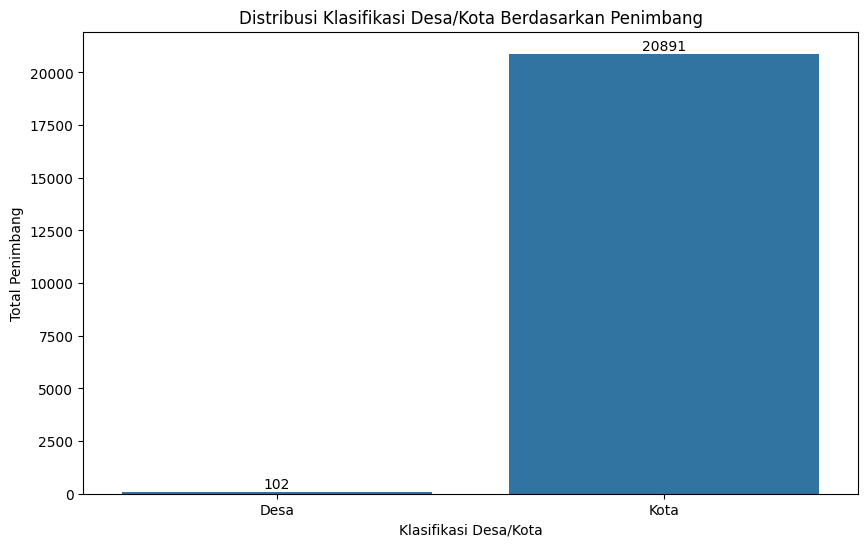

In [34]:
# Segmentasi berdasarkan klasifikasi desa/kota dengan bobot
segment_desa_kota_weighted = data.groupby('klasifikasi_desa_kota').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi desa/kota gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='klasifikasi_desa_kota', y='total_penimbang', data=segment_desa_kota_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Desa/Kota Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Desa/Kota')
plt.show()


### Distribusi Jumlah Anggota Rumah Tangga dan Hubungan dengan Kepala Rumah Tangga

/tmp/ipython-input-390577.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_jml_art_weighted = data.groupby('jml_art').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


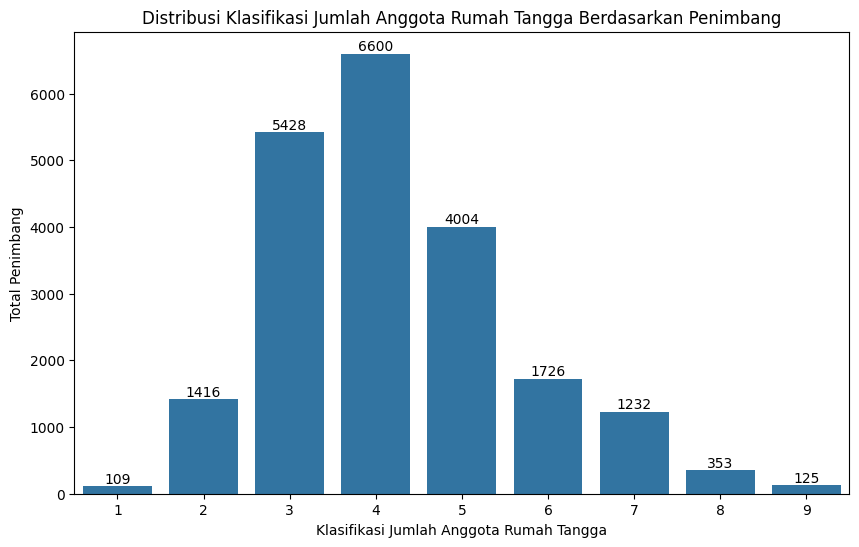

In [35]:
# Segmentasi berdasarkan klasifikasi jumlah anggota rumah tangga dengan bobot
segment_jml_art_weighted = data.groupby('jml_art').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi jumlah anggota rumah tangga gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='jml_art', y='total_penimbang', data=segment_jml_art_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Jumlah Anggota Rumah Tangga Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Jumlah Anggota Rumah Tangga')
plt.show()


/tmp/ipython-input-3391862014.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_jml_art_5th_keatas_weighted = data.groupby('jml_art_5th_keatas').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


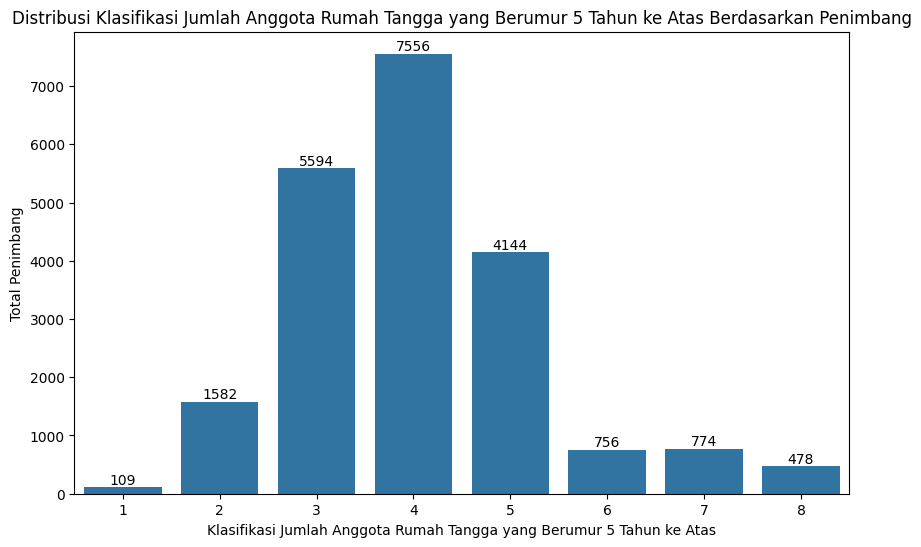

In [36]:
# Segmentasi berdasarkan klasifikasi jumlah anggota rumah tangga yang berumur 5 tahun ke atas dengan bobot
segment_jml_art_5th_keatas_weighted = data.groupby('jml_art_5th_keatas').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi jumlah anggota rumah tangga yang berumur 5 tahun ke atas gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='jml_art_5th_keatas', y='total_penimbang', data=segment_jml_art_5th_keatas_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Jumlah Anggota Rumah Tangga yang Berumur 5 Tahun ke Atas Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Jumlah Anggota Rumah Tangga yang Berumur 5 Tahun ke Atas')
plt.show()

/tmp/ipython-input-1541238413.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_hubungan_dengan_krt_weighted = data.groupby('hubungan_dengan_krt').apply(


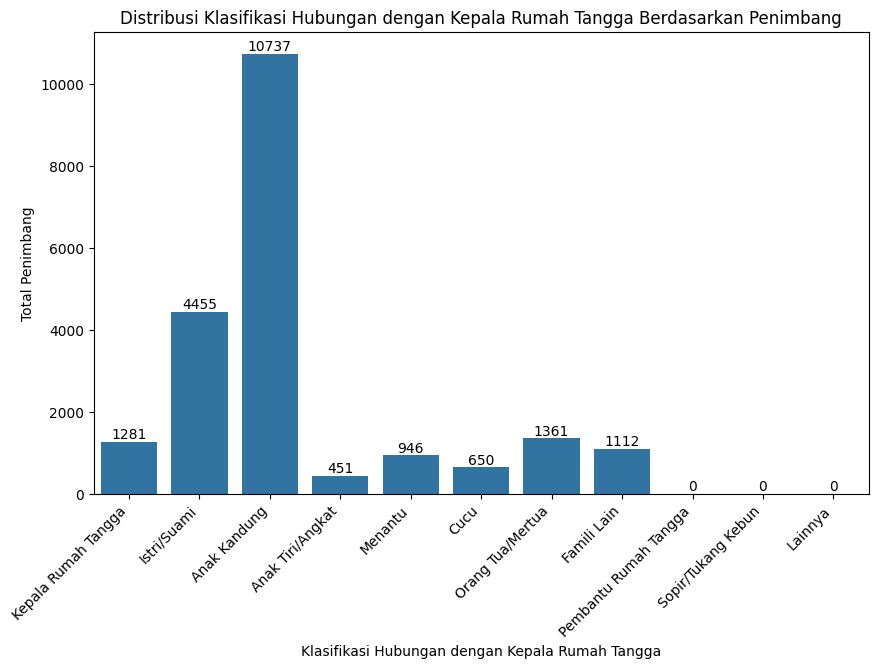

In [37]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Kepala Rumah Tangga', 'Istri/Suami', 'Anak Kandung', 'Anak Tiri/Angkat', 'Menantu', 'Cucu', 'Orang Tua/Mertua', 'Famili Lain', 'Pembantu Rumah Tangga', 'Sopir/Tukang Kebun', 'Lainnya']

# Segmentasi berdasarkan klasifikasi hubungan dengan kepala rumah tangga dengan bobot
segment_hubungan_dengan_krt_weighted = data.groupby('hubungan_dengan_krt').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_hubungan_dengan_krt_weighted['hubungan_dengan_krt'] = pd.Categorical(segment_hubungan_dengan_krt_weighted['hubungan_dengan_krt'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['hubungan_dengan_krt'])
segment_hubungan_dengan_krt_weighted = all_categories.merge(segment_hubungan_dengan_krt_weighted, on='hubungan_dengan_krt', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi hubungan dengan kepala rumah tangga gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='hubungan_dengan_krt', y='total_penimbang', data=segment_hubungan_dengan_krt_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Hubungan dengan Kepala Rumah Tangga Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Hubungan dengan Kepala Rumah Tangga')
plt.xticks(rotation=45, ha="right")
plt.show()


### Distribusi Jenis Kelamin

/tmp/ipython-input-3896241828.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_jenis_kelamin_weighted = data.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


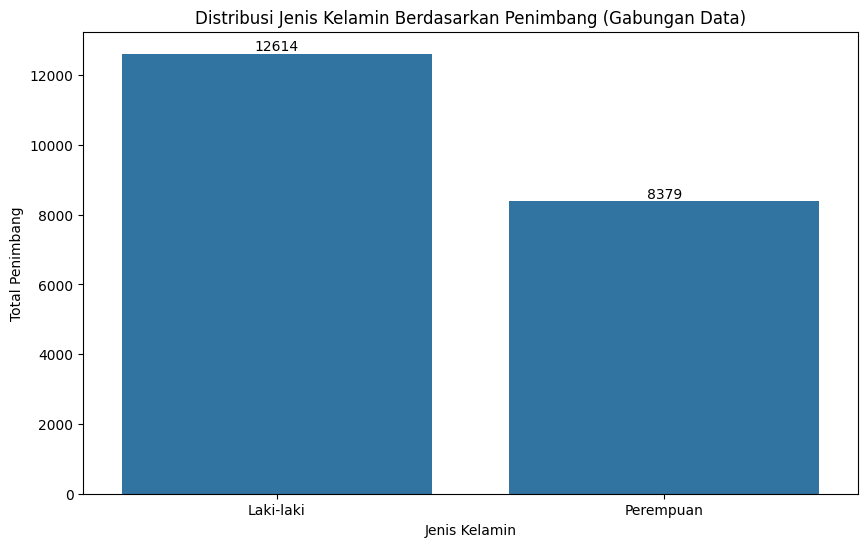

In [38]:
# Visualisasi frekuensi tertimbang berdasarkan jenis kelamin
segment_jenis_kelamin_weighted = data.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk data gabungan dari semua tahun
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='jenis_kelamin', y='total_penimbang', data=segment_jenis_kelamin_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Jenis Kelamin Berdasarkan Penimbang (Gabungan Data)')
plt.ylabel('Total Penimbang')
plt.xlabel('Jenis Kelamin')
plt.show()


### Distribusi Umur Berdasarkan Generasi, Kelompok Umur, dan Kategori Umur

/tmp/ipython-input-1064359079.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_generasi_weighted = data.groupby('generasi').apply(


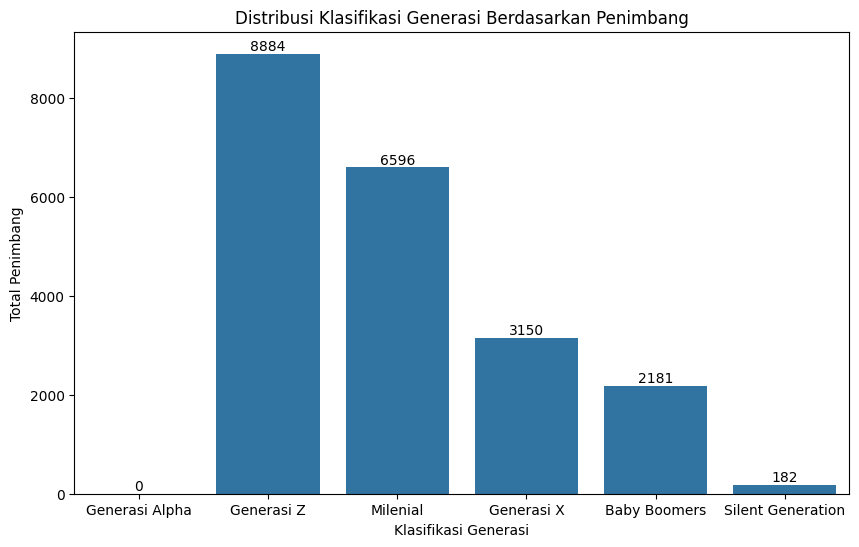

In [39]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Generasi Alpha', 'Generasi Z', 'Milenial', 'Generasi X', 'Baby Boomers', 'Silent Generation']

# Segmentasi berdasarkan klasifikasi generasi dengan bobot
segment_generasi_weighted = data.groupby('generasi').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_generasi_weighted['generasi'] = pd.Categorical(segment_generasi_weighted['generasi'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['generasi'])
segment_generasi_weighted = all_categories.merge(segment_generasi_weighted, on='generasi', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi generasi gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='generasi', y='total_penimbang', data=segment_generasi_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Generasi Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Generasi')
plt.show()


/tmp/ipython-input-1571889970.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_kelompok_5_tahun_weighted = data.groupby('kelompok_5_tahun').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


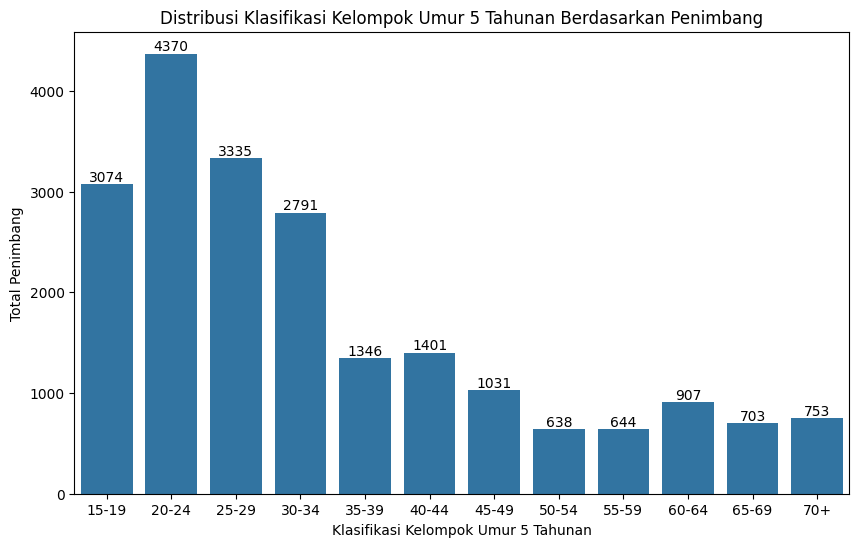

In [40]:
# Segmentasi berdasarkan klasifikasi kelompok umur 5 tahunan dengan bobot
segment_kelompok_5_tahun_weighted = data.groupby('kelompok_5_tahun').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi kelompok umur 5 tahunan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='kelompok_5_tahun', y='total_penimbang', data=segment_kelompok_5_tahun_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Kelompok Umur 5 Tahunan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Kelompok Umur 5 Tahunan')
plt.show()


/tmp/ipython-input-4266812343.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_kategori_umur_weighted = data.groupby('kategori_umur').apply(


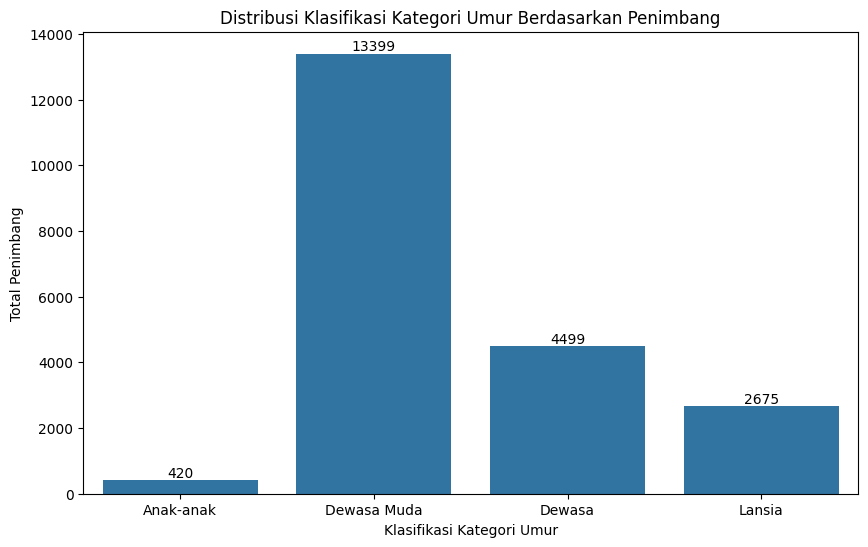

In [41]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Anak-anak', 'Dewasa Muda', 'Dewasa', 'Lansia']

# Segmentasi berdasarkan klasifikasi kategori umur dengan bobot
segment_kategori_umur_weighted = data.groupby('kategori_umur').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_kategori_umur_weighted['kategori_umur'] = pd.Categorical(segment_kategori_umur_weighted['kategori_umur'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['kategori_umur'])
segment_kategori_umur_weighted = all_categories.merge(segment_kategori_umur_weighted, on='kategori_umur', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi kategori umur gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='kategori_umur', y='total_penimbang', data=segment_kategori_umur_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Kategori Umur Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Kategori Umur')
plt.show()


### Distribusi Status Perkawinan

/tmp/ipython-input-3720670612.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_status_perkawinan_weighted = data.groupby('status_perkawinan').apply(


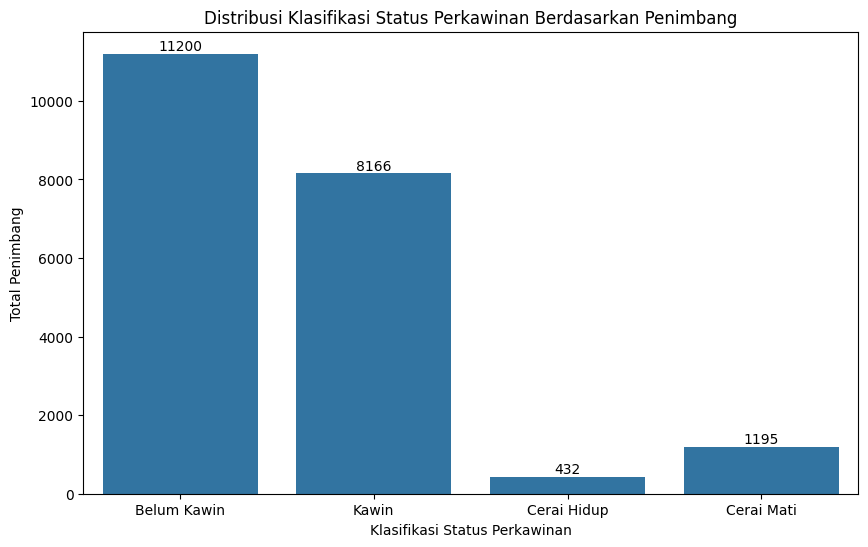

In [42]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Belum Kawin', 'Kawin', 'Cerai Hidup', 'Cerai Mati']

# Segmentasi berdasarkan klasifikasi status perkawinan dengan bobot
segment_status_perkawinan_weighted = data.groupby('status_perkawinan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_status_perkawinan_weighted['status_perkawinan'] = pd.Categorical(segment_status_perkawinan_weighted['status_perkawinan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['status_perkawinan'])
segment_status_perkawinan_weighted = all_categories.merge(segment_status_perkawinan_weighted, on='status_perkawinan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi status perkawinan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='status_perkawinan', y='total_penimbang', data=segment_status_perkawinan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Status Perkawinan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Status Perkawinan')
plt.show()


### Distribusi Klasifikasi Status Sekolah, Pendidikan Terakhir, dan Tahun Lulus Pendidikan Terakhir

/tmp/ipython-input-2918303432.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_partisipasi_sekolah_weighted = data.groupby('partisipasi_sekolah').apply(


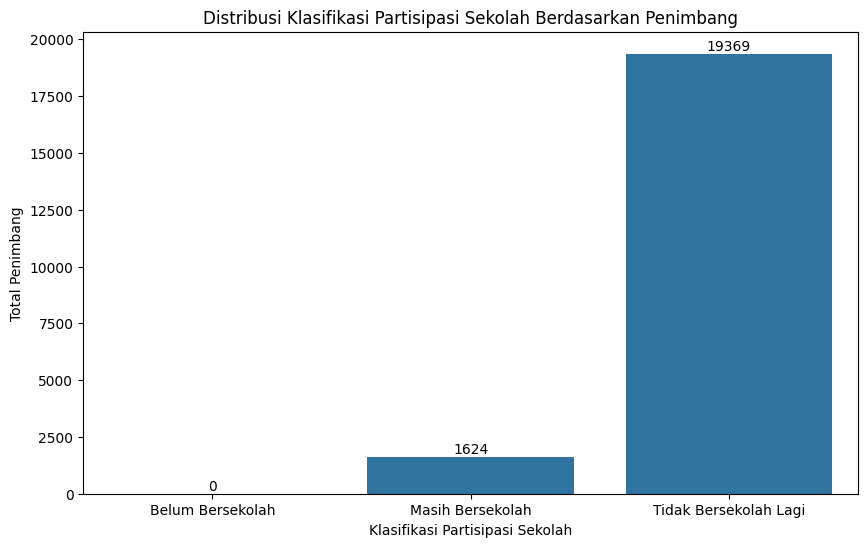

In [43]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Belum Bersekolah', 'Masih Bersekolah', 'Tidak Bersekolah Lagi']

# Segmentasi berdasarkan klasifikasi partisipasi sekolah dengan bobot
segment_partisipasi_sekolah_weighted = data.groupby('partisipasi_sekolah').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_partisipasi_sekolah_weighted['partisipasi_sekolah'] = pd.Categorical(segment_partisipasi_sekolah_weighted['partisipasi_sekolah'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['partisipasi_sekolah'])
segment_partisipasi_sekolah_weighted = all_categories.merge(segment_partisipasi_sekolah_weighted, on='partisipasi_sekolah', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi partisipasi sekolah gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='partisipasi_sekolah', y='total_penimbang', data=segment_partisipasi_sekolah_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Partisipasi Sekolah Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Partisipasi Sekolah')
plt.show()


/tmp/ipython-input-2309180636.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_pendidikan_tertinggi_weighted = data.groupby('pendidikan_tertinggi').apply(


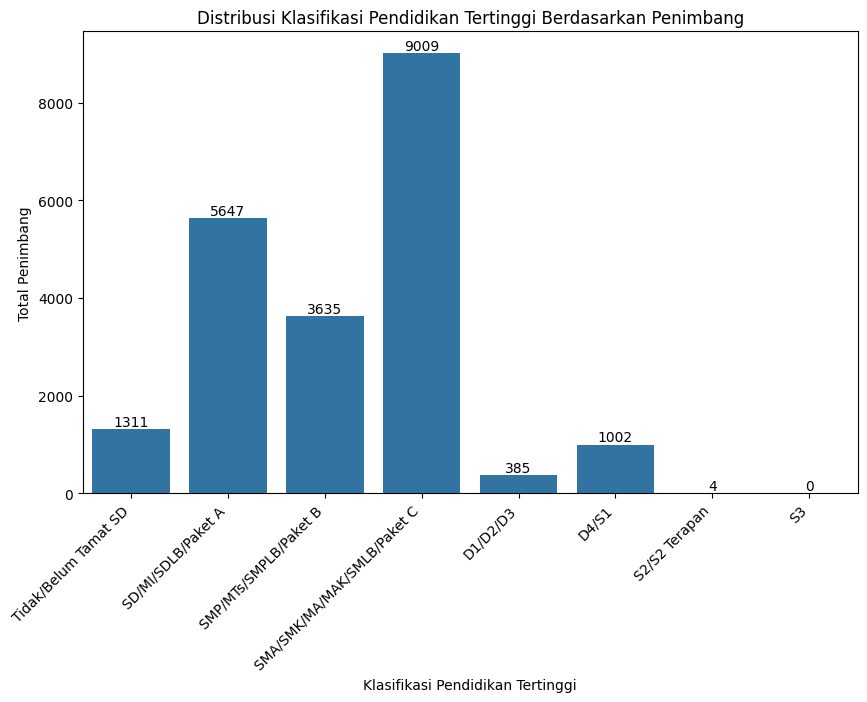

In [44]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Tidak/Belum Tamat SD', 'SD/MI/SDLB/Paket A', 'SMP/MTs/SMPLB/Paket B',
                   'SMA/SMK/MA/MAK/SMLB/Paket C', 'D1/D2/D3', 'D4/S1', 'S2/S2 Terapan', 'S3']

# Segmentasi berdasarkan klasifikasi pendidikan tertinggi dengan bobot
segment_pendidikan_tertinggi_weighted = data.groupby('pendidikan_tertinggi').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'] = pd.Categorical(segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['pendidikan_tertinggi'])
segment_pendidikan_tertinggi_weighted = all_categories.merge(segment_pendidikan_tertinggi_weighted, on='pendidikan_tertinggi', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi pendidikan tertinggi gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pendidikan_tertinggi', y='total_penimbang', data=segment_pendidikan_tertinggi_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Pendidikan Tertinggi Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pendidikan Tertinggi')
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-2329906184.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_penyelenggara_pendidikan_weighted = data.groupby('penyelenggara_pendidikan').apply(


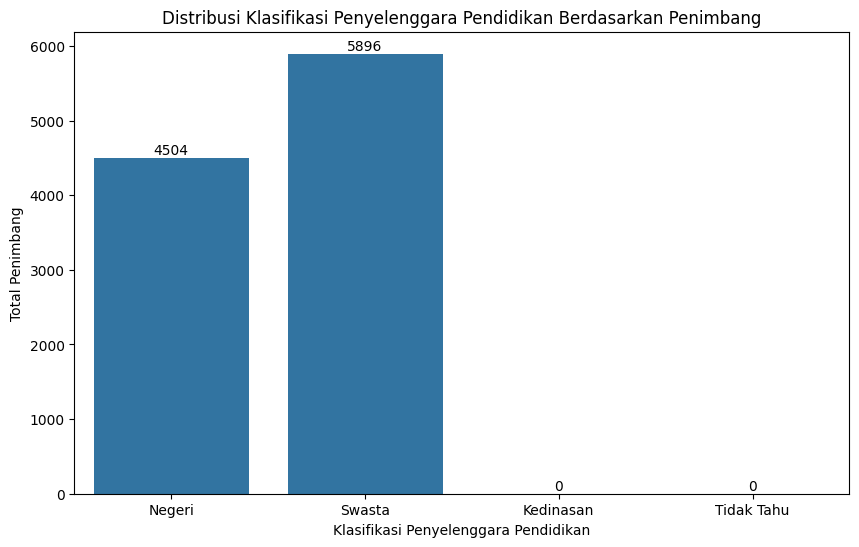

In [45]:
# Filter data untuk hanya menampilkan baris dengan penyelenggara pendidikan yang tidak "-"
data_filtered = data[data['penyelenggara_pendidikan'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Negeri', 'Swasta', 'Kedinasan',
                   'Tidak Tahu']

# Segmentasi berdasarkan klasifikasi penyelenggara pendidikan dengan bobot
segment_penyelenggara_pendidikan_weighted = data.groupby('penyelenggara_pendidikan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_penyelenggara_pendidikan_weighted['penyelenggara_pendidikan'] = pd.Categorical(segment_penyelenggara_pendidikan_weighted['penyelenggara_pendidikan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['penyelenggara_pendidikan'])
segment_penyelenggara_pendidikan_weighted = all_categories.merge(segment_penyelenggara_pendidikan_weighted, on='penyelenggara_pendidikan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi penyelenggara pendidikan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='penyelenggara_pendidikan', y='total_penimbang', data=segment_penyelenggara_pendidikan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Penyelenggara Pendidikan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Penyelenggara Pendidikan')
plt.show()


/tmp/ipython-input-2688497810.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_sd_sederajat_weighted = data_filtered.groupby('tahun_lulus_sd_sederajat').apply(


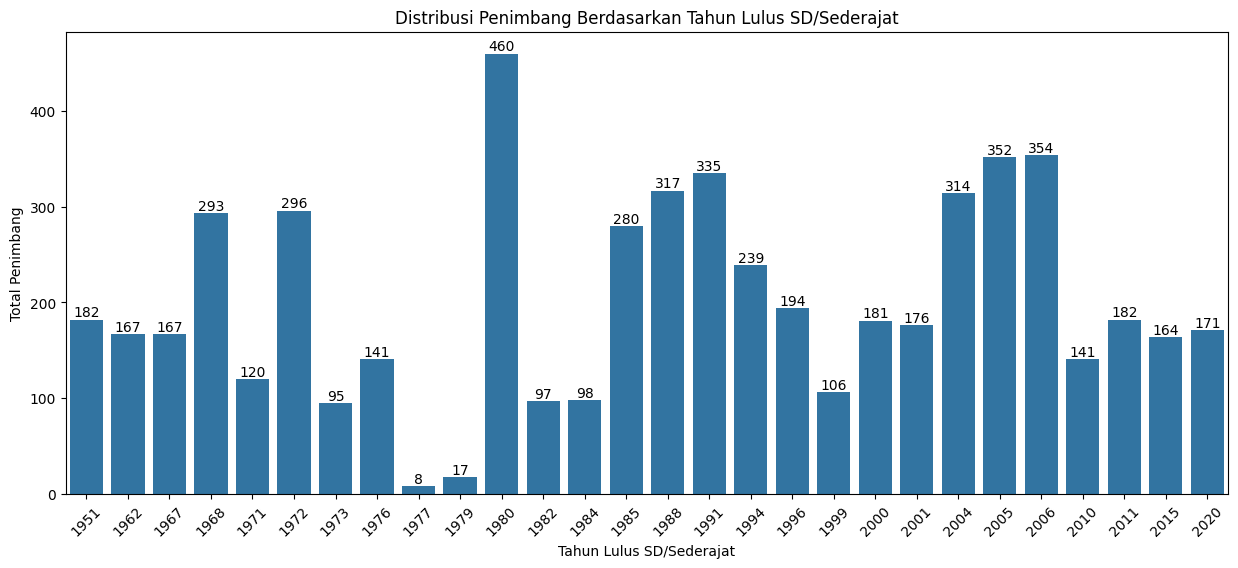

In [46]:
# Filter data untuk hanya menampilkan baris dengan tahun lulus SD/Sederajat yang tidak "-"
data_filtered = data[data['tahun_lulus_sd_sederajat'] != '-']

# Segmentasi berdasarkan tahun lulus SD/Sederajat dengan bobot
segment_tahun_lulus_sd_sederajat_weighted = data_filtered.groupby('tahun_lulus_sd_sederajat').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi tahun lulus SD/Sederajat
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='tahun_lulus_sd_sederajat', y='total_penimbang', data=segment_tahun_lulus_sd_sederajat_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus SD/Sederajat')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus SD/Sederajat')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2623851159.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_smp_sederajat_weighted = data_filtered.groupby('tahun_lulus_smp_sederajat').apply(


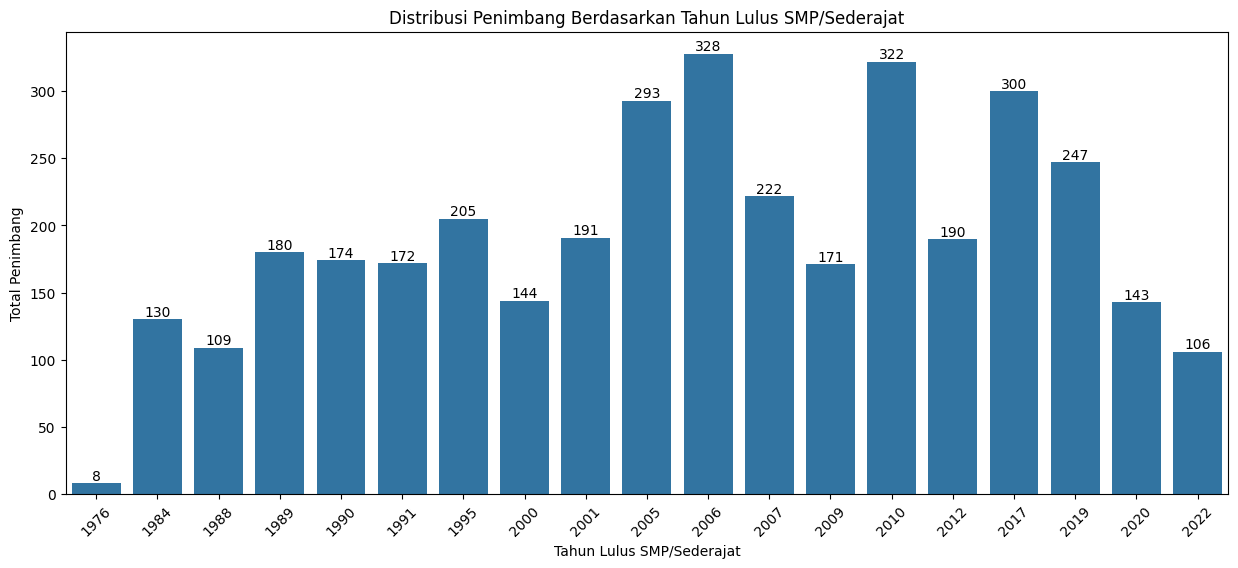

In [47]:
# Filter data untuk hanya menampilkan baris dengan tahun lulus SMP/Sederajat yang tidak "-"
data_filtered = data[data['tahun_lulus_smp_sederajat'] != '-']

# Segmentasi berdasarkan tahun lulus SMP/Sederajat dengan bobot
segment_tahun_lulus_smp_sederajat_weighted = data_filtered.groupby('tahun_lulus_smp_sederajat').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi tahun lulus SMP/Sederajat
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='tahun_lulus_smp_sederajat', y='total_penimbang', data=segment_tahun_lulus_smp_sederajat_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus SMP/Sederajat')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus SMP/Sederajat')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1944393905.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_sma_sederajat_weighted = data_filtered.groupby('tahun_lulus_sma_sederajat').apply(


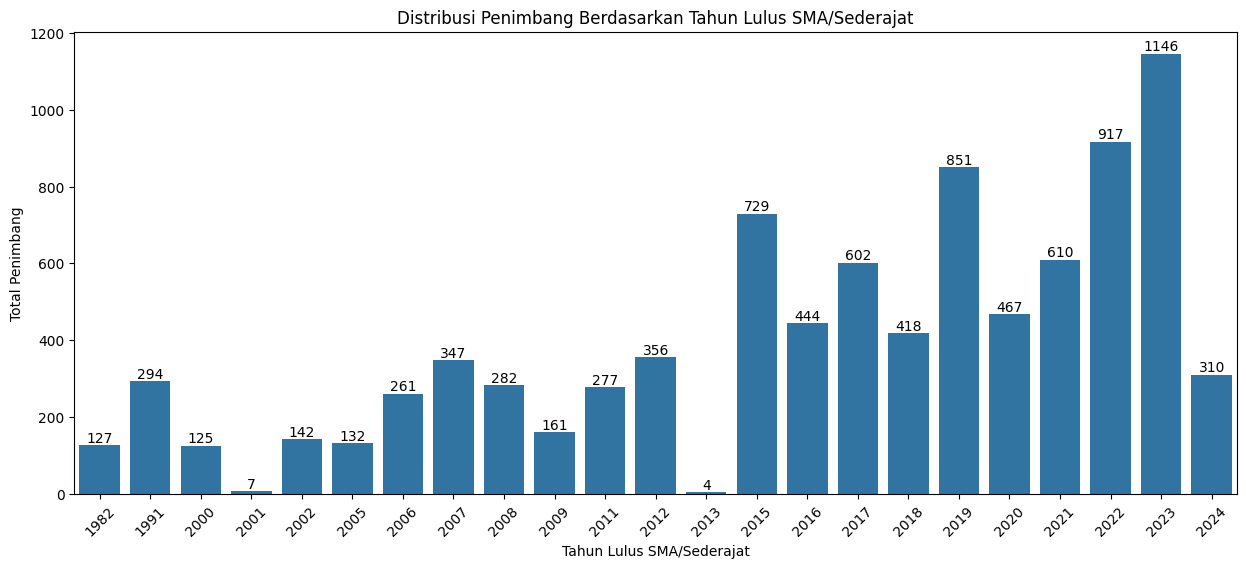

In [48]:
# Filter data untuk hanya menampilkan baris dengan tahun lulus SMA/Sederajat yang tidak "-"
data_filtered = data[data['tahun_lulus_sma_sederajat'] != '-']

# Segmentasi berdasarkan tahun lulus SMA/Sederajat dengan bobot
segment_tahun_lulus_sma_sederajat_weighted = data_filtered.groupby('tahun_lulus_sma_sederajat').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi tahun lulus SMA/Sederajat
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='tahun_lulus_sma_sederajat', y='total_penimbang', data=segment_tahun_lulus_sma_sederajat_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus SMA/Sederajat')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus SMA/Sederajat')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-920733226.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_d1_d2_d3_weighted = data_filtered.groupby('tahun_lulus_d1_d2_d3').apply(


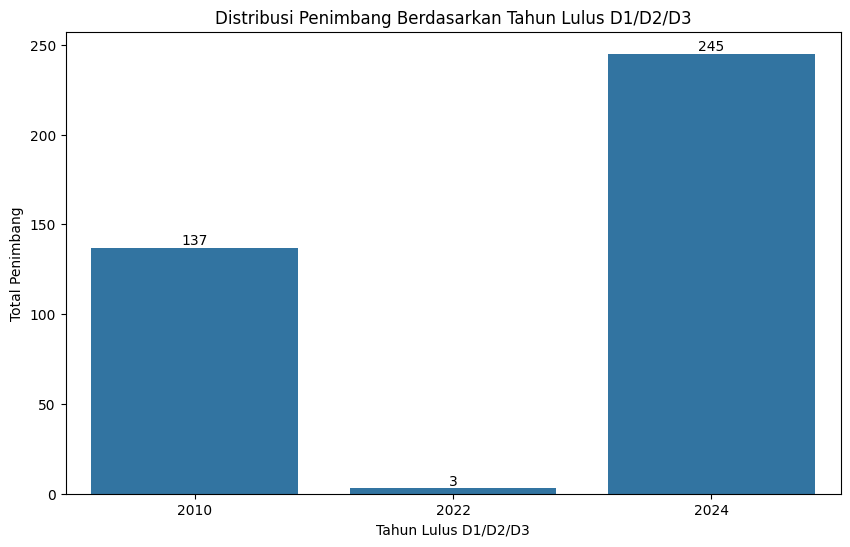

In [49]:
# Filter data untuk hanya menampilkan baris dengan tahun lulus D1/D2/D3 yang tidak "-"
data_filtered = data[data['tahun_lulus_d1_d2_d3'] != '-']

# Segmentasi berdasarkan tahun lulus D1/D2/D3 dengan bobot
segment_tahun_lulus_d1_d2_d3_weighted = data_filtered.groupby('tahun_lulus_d1_d2_d3').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi tahun lulus D1/D2/D3
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='tahun_lulus_d1_d2_d3', y='total_penimbang', data=segment_tahun_lulus_d1_d2_d3_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus D1/D2/D3')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus D1/D2/D3')
plt.show()


/tmp/ipython-input-3694512215.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_d4_s1_weighted = data_filtered.groupby('tahun_lulus_d4_s1').apply(


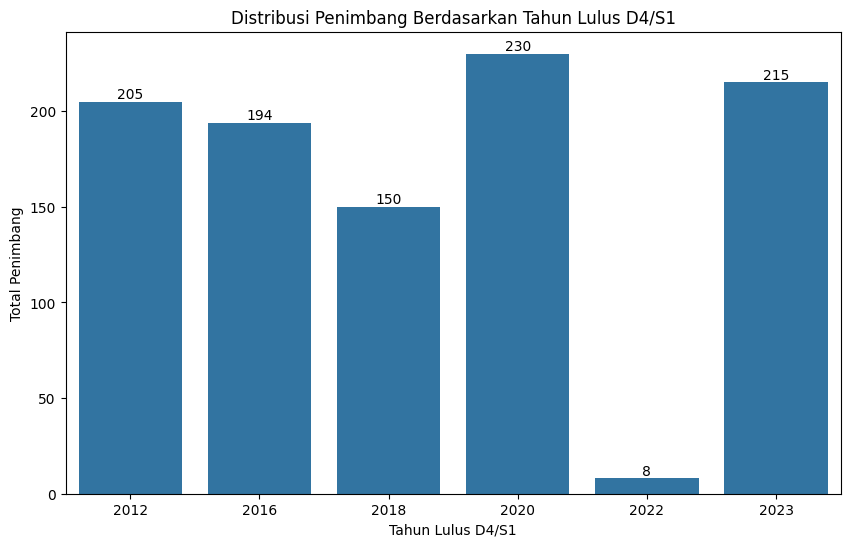

In [50]:
# Filter data untuk hanya menampilkan baris dengan tahun lulus D4/S1 yang tidak "-"
data_filtered = data[data['tahun_lulus_d4_s1'] != '-']

# Segmentasi berdasarkan tahun lulus D4/S1 dengan bobot
segment_tahun_lulus_d4_s1_weighted = data_filtered.groupby('tahun_lulus_d4_s1').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi tahun lulus D4/S1
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='tahun_lulus_d4_s1', y='total_penimbang', data=segment_tahun_lulus_d4_s1_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus D4/S1')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus D4/S1')
plt.show()


/tmp/ipython-input-1857138658.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_s2_s2_terapan_weighted = data_filtered.groupby('tahun_lulus_s2_s2_terapan').apply(


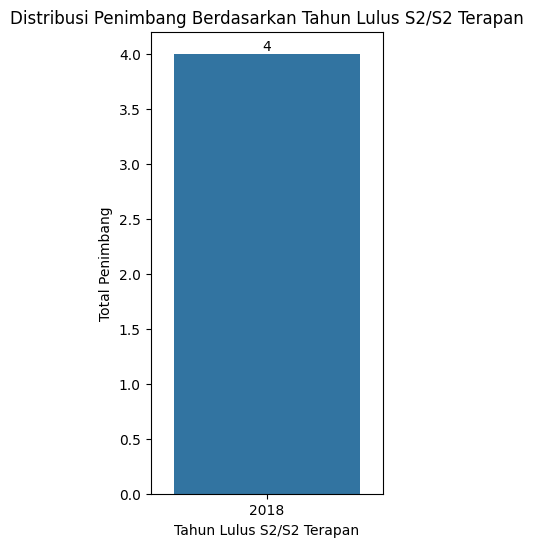

In [51]:
# Filter data untuk hanya menampilkan baris dengan tahun lulus S2/S2 Terapan yang tidak "-"
data_filtered = data[data['tahun_lulus_s2_s2_terapan'] != '-']

# Segmentasi berdasarkan tahun lulus S2/S2 Terapan dengan bobot
segment_tahun_lulus_s2_s2_terapan_weighted = data_filtered.groupby('tahun_lulus_s2_s2_terapan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot untuk distribusi tahun lulus S2/S2 Terapan
plt.figure(figsize=(3, 6))
ax = sns.barplot(x='tahun_lulus_s2_s2_terapan', y='total_penimbang', data=segment_tahun_lulus_s2_s2_terapan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus S2/S2 Terapan')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus S2/S2 Terapan')
plt.show()


/tmp/ipython-input-2556019872.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_tahun_lulus_s3_weighted = data.groupby('tahun_lulus_s3').apply(


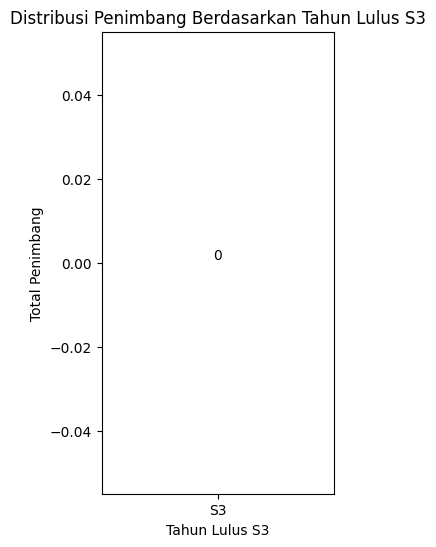

In [52]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['S3']

# Segmentasi berdasarkan tahun lulus S3 dengan bobot
segment_tahun_lulus_s3_weighted = data.groupby('tahun_lulus_s3').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_tahun_lulus_s3_weighted['tahun_lulus_s3'] = pd.Categorical(segment_tahun_lulus_s3_weighted['tahun_lulus_s3'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['tahun_lulus_s3'])
segment_tahun_lulus_s3_weighted = all_categories.merge(segment_tahun_lulus_s3_weighted, on='tahun_lulus_s3', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi tahun lulus S3 gabungan
plt.figure(figsize=(3, 6))
ax = sns.barplot(x='tahun_lulus_s3', y='total_penimbang', data=segment_tahun_lulus_s3_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Penimbang Berdasarkan Tahun Lulus S3')
plt.ylabel('Total Penimbang')
plt.xlabel('Tahun Lulus S3')
plt.show()


### Distribusi Pernah Mendapat Pelatihan dan Sertifikat Pelatihan

/tmp/ipython-input-119875425.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_pernah_pelatihan_weighted = data.groupby('pernah_pelatihan').apply(


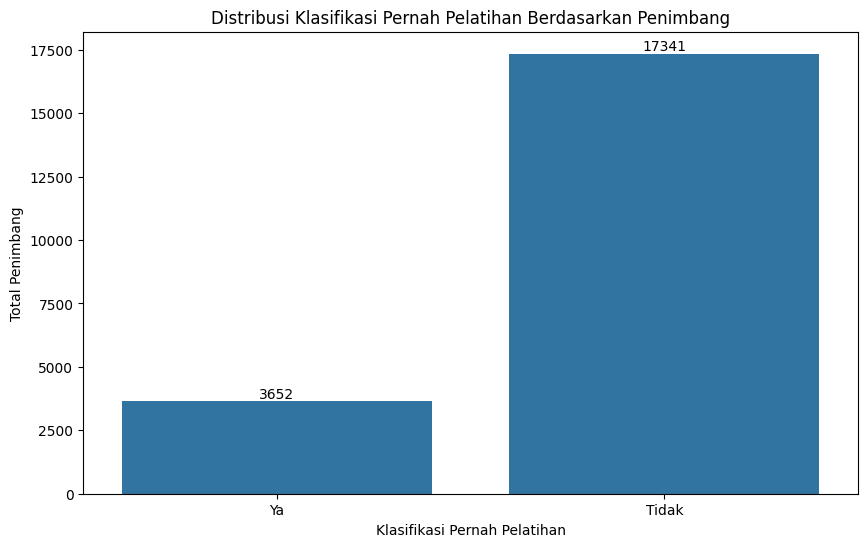

In [53]:
# Filter data untuk hanya menampilkan baris dengan pernah pelatihan yang tidak "-"
data_filtered = data[data['pernah_pelatihan'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi pernah pelatihan dengan bobot
segment_pernah_pelatihan_weighted = data.groupby('pernah_pelatihan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_pernah_pelatihan_weighted['pernah_pelatihan'] = pd.Categorical(segment_pernah_pelatihan_weighted['pernah_pelatihan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['pernah_pelatihan'])
segment_pernah_pelatihan_weighted = all_categories.merge(segment_pernah_pelatihan_weighted, on='pernah_pelatihan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi pernah pelatihan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pernah_pelatihan', y='total_penimbang', data=segment_pernah_pelatihan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Pernah Pelatihan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pernah Pelatihan')
plt.show()


/tmp/ipython-input-533478576.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_sertifikat_pelatihan_weighted = data.groupby('sertifikat_pelatihan').apply(


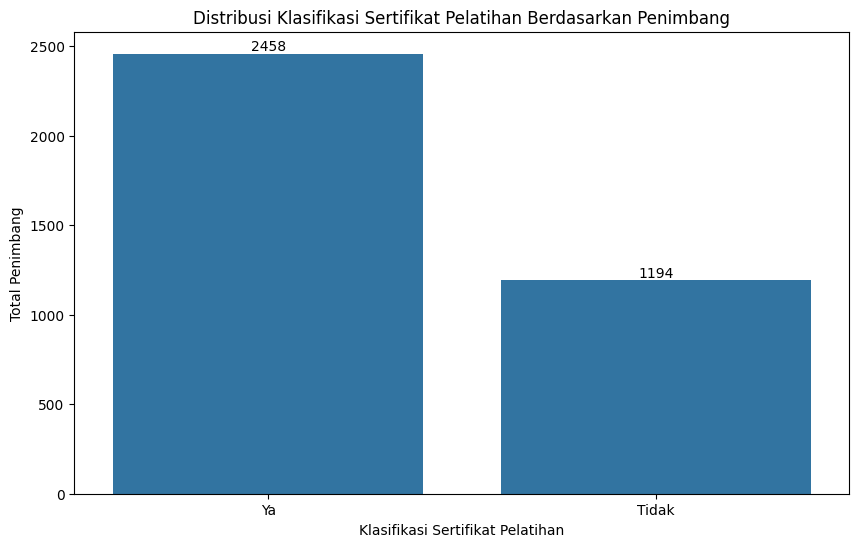

In [54]:
# Filter data untuk hanya menampilkan baris dengan sertifikat pelatihan yang tidak "-"
data_filtered = data[data['sertifikat_pelatihan'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi sertifikat pelatihan dengan bobot
segment_sertifikat_pelatihan_weighted = data.groupby('sertifikat_pelatihan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_sertifikat_pelatihan_weighted['sertifikat_pelatihan'] = pd.Categorical(segment_sertifikat_pelatihan_weighted['sertifikat_pelatihan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['sertifikat_pelatihan'])
segment_sertifikat_pelatihan_weighted = all_categories.merge(segment_sertifikat_pelatihan_weighted, on='sertifikat_pelatihan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi sertifikat pelatihan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sertifikat_pelatihan', y='total_penimbang', data=segment_sertifikat_pelatihan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Sertifikat Pelatihan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Sertifikat Pelatihan')
plt.show()


### Distribusi Klasifikasi Disabilitas Penglihatan, Pendengaran, Tangan, dan Komunikasi

/tmp/ipython-input-1929816010.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_disabilitas_penglihatan_weighted = data.groupby('disabilitas_penglihatan').apply(


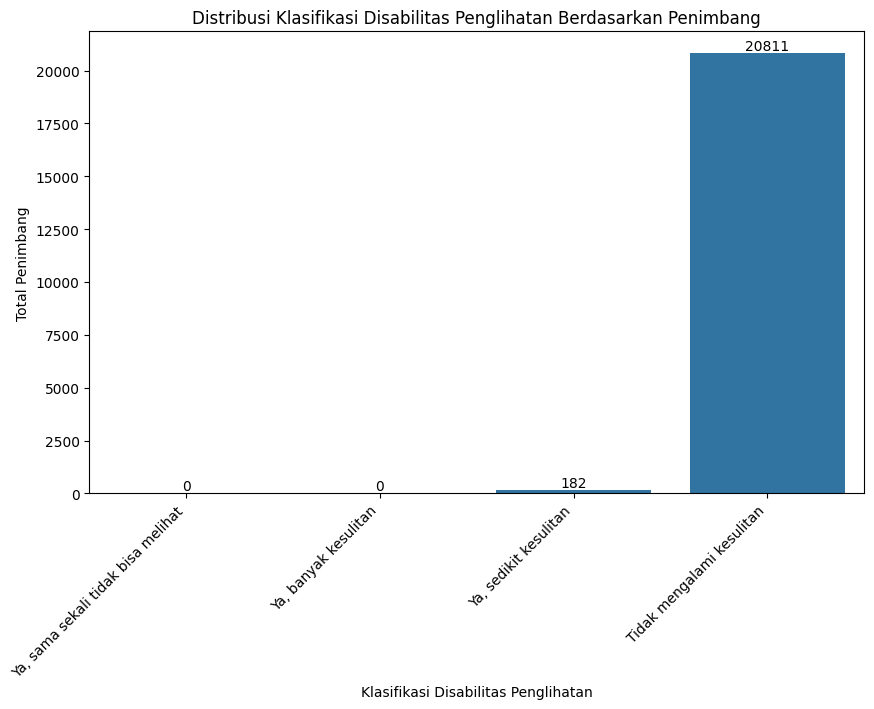

In [55]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya, sama sekali tidak bisa melihat', 'Ya, banyak kesulitan', 'Ya, sedikit kesulitan', 'Tidak mengalami kesulitan']

# Segmentasi berdasarkan klasifikasi disabilitas penglihatan dengan bobot
segment_disabilitas_penglihatan_weighted = data.groupby('disabilitas_penglihatan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_disabilitas_penglihatan_weighted['disabilitas_penglihatan'] = pd.Categorical(segment_disabilitas_penglihatan_weighted['disabilitas_penglihatan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['disabilitas_penglihatan'])
segment_disabilitas_penglihatan_weighted = all_categories.merge(segment_disabilitas_penglihatan_weighted, on='disabilitas_penglihatan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi disabilitas penglihatan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='disabilitas_penglihatan', y='total_penimbang', data=segment_disabilitas_penglihatan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Disabilitas Penglihatan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Disabilitas Penglihatan')
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-499392732.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_disabilitas_pendengaran_weighted = data.groupby('disabilitas_pendengaran').apply(


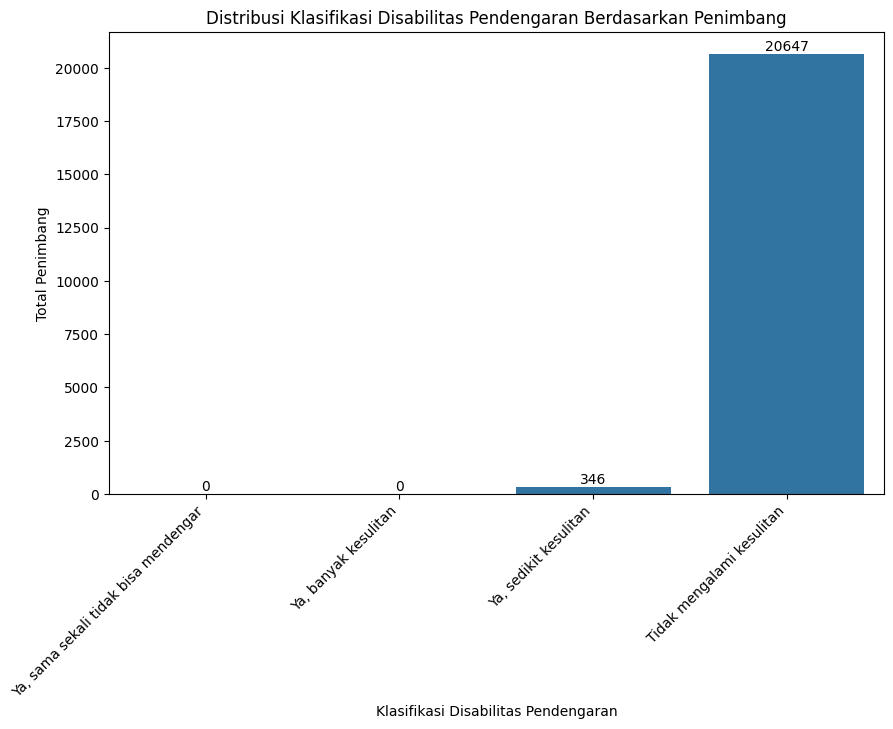

In [56]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya, sama sekali tidak bisa mendengar', 'Ya, banyak kesulitan', 'Ya, sedikit kesulitan', 'Tidak mengalami kesulitan']

# Segmentasi berdasarkan klasifikasi disabilitas pendengaran dengan bobot
segment_disabilitas_pendengaran_weighted = data.groupby('disabilitas_pendengaran').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_disabilitas_pendengaran_weighted['disabilitas_pendengaran'] = pd.Categorical(segment_disabilitas_pendengaran_weighted['disabilitas_pendengaran'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['disabilitas_pendengaran'])
segment_disabilitas_pendengaran_weighted = all_categories.merge(segment_disabilitas_pendengaran_weighted, on='disabilitas_pendengaran', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi disabilitas pendengaran gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='disabilitas_pendengaran', y='total_penimbang', data=segment_disabilitas_pendengaran_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Disabilitas Pendengaran Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Disabilitas Pendengaran')
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-1252676971.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_disabilitas_tangan_weighted = data.groupby('disabilitas_tangan').apply(


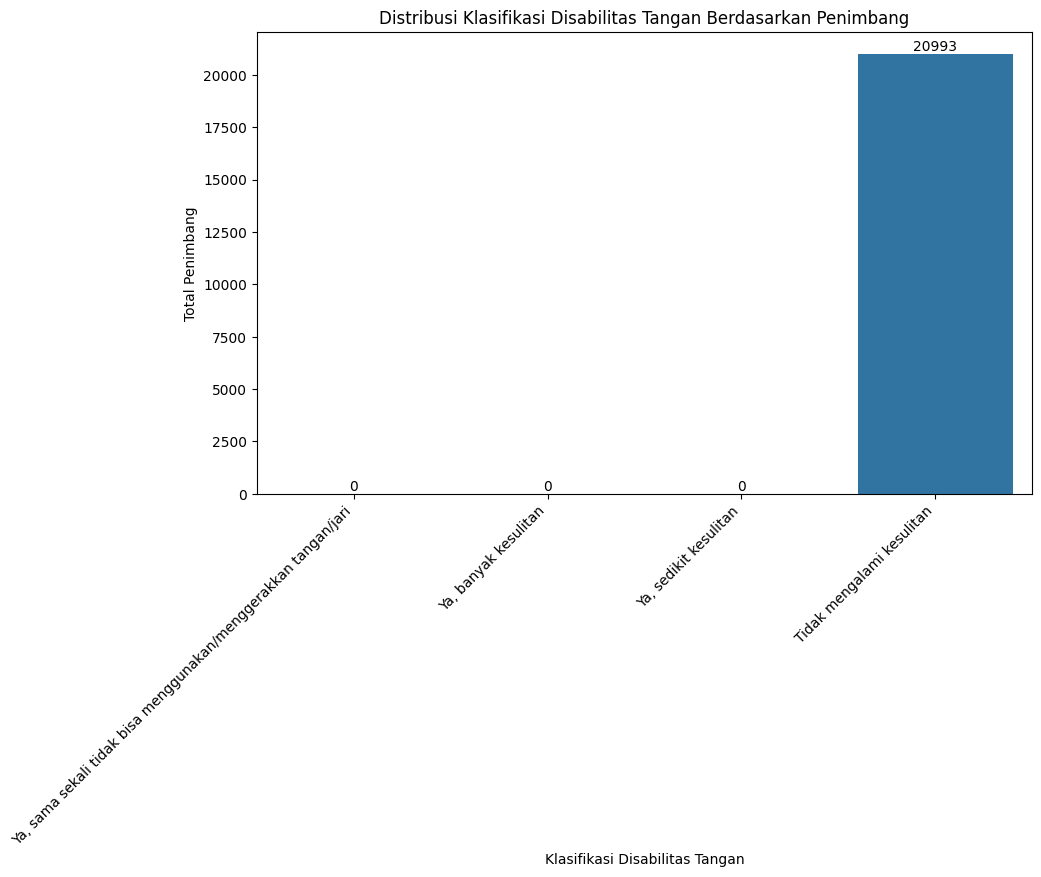

In [57]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya, sama sekali tidak bisa menggunakan/menggerakkan tangan/jari', 'Ya, banyak kesulitan', 'Ya, sedikit kesulitan', 'Tidak mengalami kesulitan']

# Segmentasi berdasarkan klasifikasi disabilitas tangan dengan bobot
segment_disabilitas_tangan_weighted = data.groupby('disabilitas_tangan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_disabilitas_tangan_weighted['disabilitas_tangan'] = pd.Categorical(segment_disabilitas_tangan_weighted['disabilitas_tangan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['disabilitas_tangan'])
segment_disabilitas_tangan_weighted = all_categories.merge(segment_disabilitas_tangan_weighted, on='disabilitas_tangan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi disabilitas tangan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='disabilitas_tangan', y='total_penimbang', data=segment_disabilitas_tangan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Disabilitas Tangan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Disabilitas Tangan')
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-3300660302.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_disabilitas_komunikasi_weighted = data.groupby('disabilitas_komunikasi').apply(


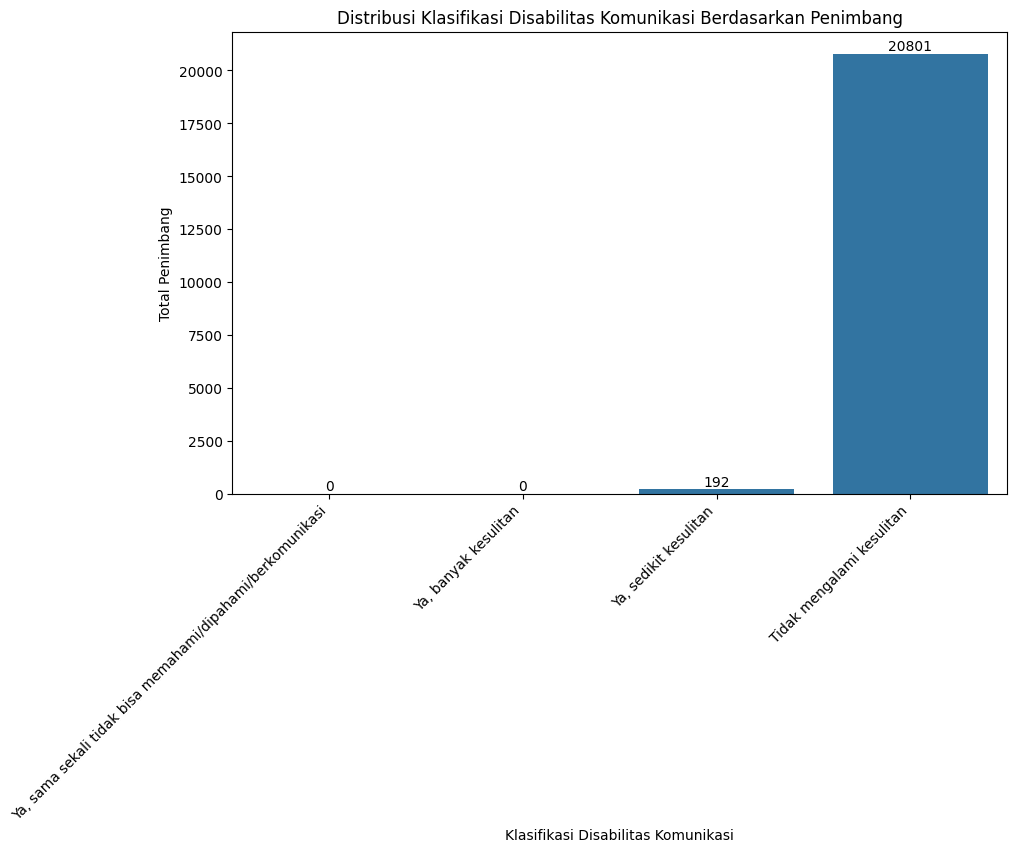

In [58]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya, sama sekali tidak bisa memahami/dipahami/berkomunikasi', 'Ya, banyak kesulitan', 'Ya, sedikit kesulitan', 'Tidak mengalami kesulitan']

# Segmentasi berdasarkan klasifikasi disabilitas komunikasi dengan bobot
segment_disabilitas_komunikasi_weighted = data.groupby('disabilitas_komunikasi').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_disabilitas_komunikasi_weighted['disabilitas_komunikasi'] = pd.Categorical(segment_disabilitas_komunikasi_weighted['disabilitas_komunikasi'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['disabilitas_komunikasi'])
segment_disabilitas_komunikasi_weighted = all_categories.merge(segment_disabilitas_komunikasi_weighted, on='disabilitas_komunikasi', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi disabilitas komunikasi gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='disabilitas_komunikasi', y='total_penimbang', data=segment_disabilitas_komunikasi_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Disabilitas Komunikasi Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Disabilitas Komunikasi')
plt.xticks(rotation=45, ha="right")
plt.show()


### Distribusi Klasifikasi Pemanfaatan Komputer, HP, dan Lainnya

/tmp/ipython-input-289895927.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_utama_pc_weighted = data.groupby('utama_pc').apply(


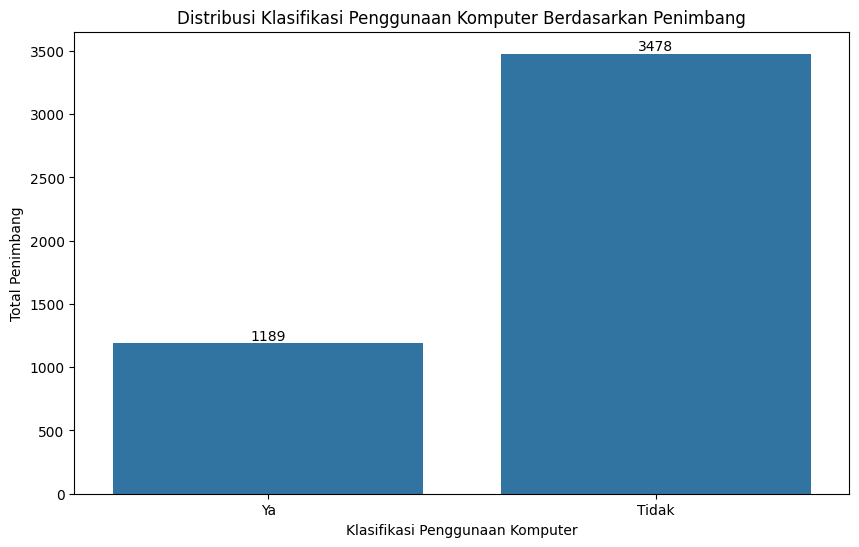

In [59]:
# Filter data untuk hanya menampilkan baris dengan penggunaan komputer yang tidak "-"
data_filtered = data[data['utama_pc'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi penggunaan komputer dengan bobot
segment_utama_pc_weighted = data.groupby('utama_pc').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_utama_pc_weighted['utama_pc'] = pd.Categorical(segment_utama_pc_weighted['utama_pc'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['utama_pc'])
segment_utama_pc_weighted = all_categories.merge(segment_utama_pc_weighted, on='utama_pc', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi penggunaan komputer gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='utama_pc', y='total_penimbang', data=segment_utama_pc_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Penggunaan Komputer Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Penggunaan Komputer')
plt.show()


/tmp/ipython-input-864986224.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_utama_hp_weighted = data.groupby('utama_hp').apply(


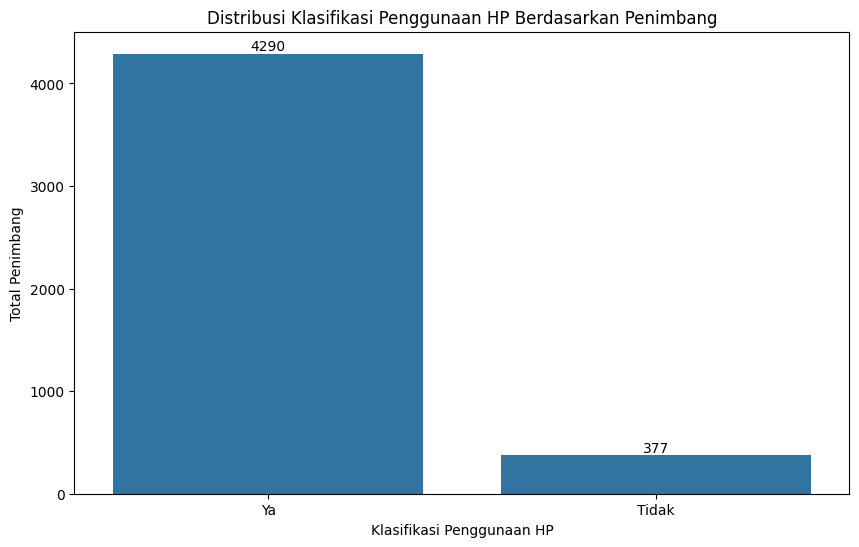

In [60]:
# Filter data untuk hanya menampilkan baris dengan penggunaan HP yang tidak "-"
data_filtered = data[data['utama_hp'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi penggunaan HP dengan bobot
segment_utama_hp_weighted = data.groupby('utama_hp').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_utama_hp_weighted['utama_hp'] = pd.Categorical(segment_utama_hp_weighted['utama_hp'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['utama_hp'])
segment_utama_hp_weighted = all_categories.merge(segment_utama_hp_weighted, on='utama_hp', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi penggunaan HP gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='utama_hp', y='total_penimbang', data=segment_utama_hp_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Penggunaan HP Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Penggunaan HP')
plt.show()


/tmp/ipython-input-449064516.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_utama_teknologi_lain_weighted = data.groupby('utama_teknologi_lain').apply(


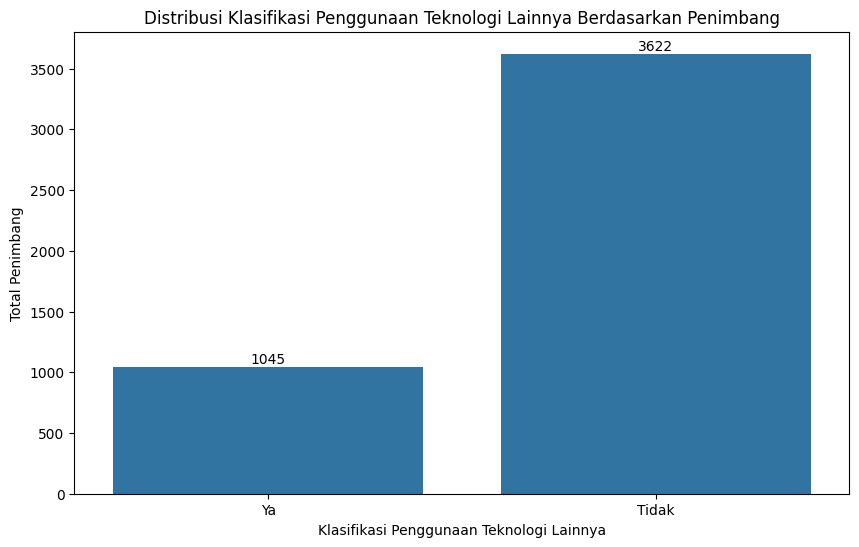

In [61]:
# Filter data untuk hanya menampilkan baris dengan penggunaan teknologi lainnya yang tidak "-"
data_filtered = data[data['utama_teknologi_lain'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi penggunaan teknologi lainnya dengan bobot
segment_utama_teknologi_lain_weighted = data.groupby('utama_teknologi_lain').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_utama_teknologi_lain_weighted['utama_teknologi_lain'] = pd.Categorical(segment_utama_teknologi_lain_weighted['utama_teknologi_lain'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['utama_teknologi_lain'])
segment_utama_teknologi_lain_weighted = all_categories.merge(segment_utama_teknologi_lain_weighted, on='utama_teknologi_lain', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi penggunaan teknologi lainnya gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='utama_teknologi_lain', y='total_penimbang', data=segment_utama_teknologi_lain_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Penggunaan Teknologi Lainnya Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Penggunaan Teknologi Lainnya')
plt.show()


### Distribusi Alasan Tidak Mencari Pekerjaan dalam Seminggu Terakhir

/tmp/ipython-input-146710033.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_alasan_tidak_cari_kerja_minggu_weighted = data.groupby('alasan_tidak_cari_kerja_minggu').apply(


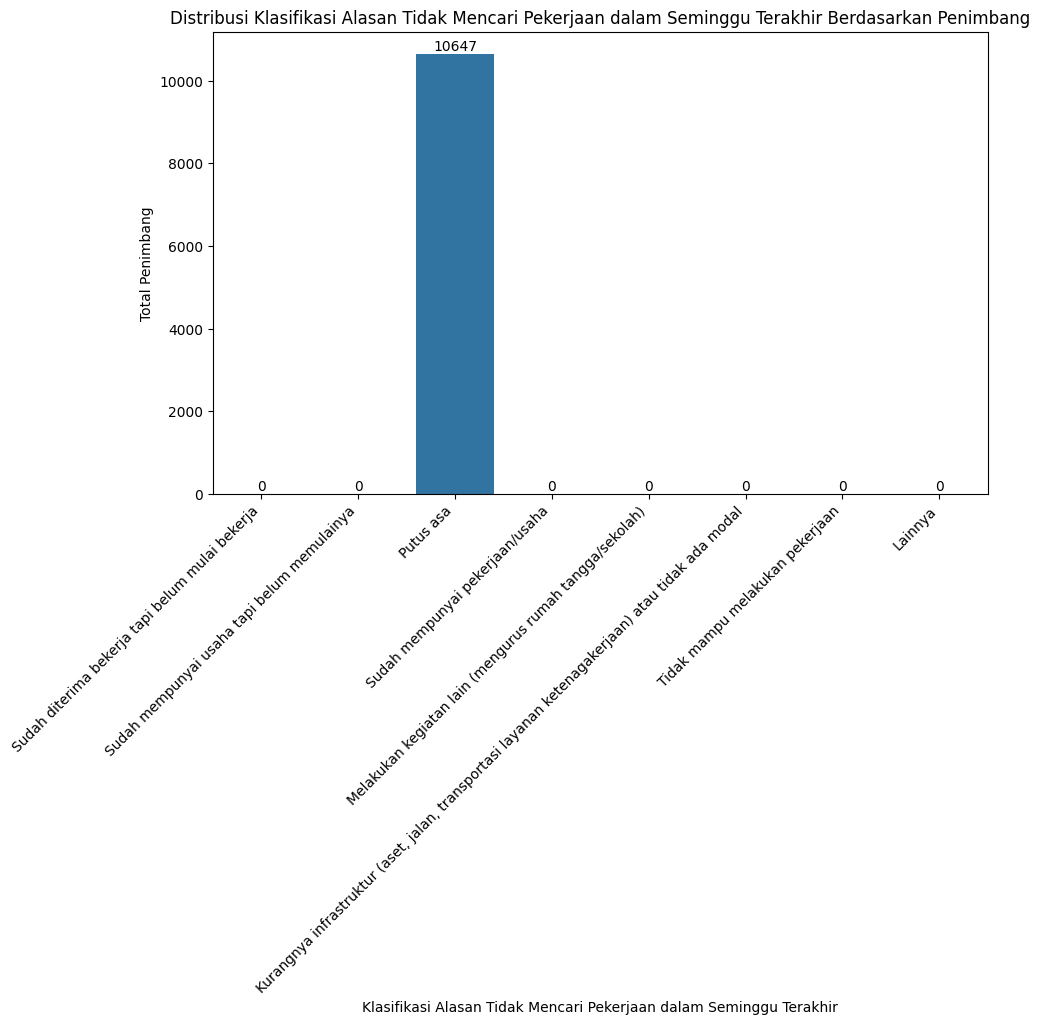

In [62]:
# Filter data untuk hanya menampilkan baris dengan alasan tidak mencari pekerjaan dalam seminggu terakhir yang tidak "-"
data_filtered = data[data['alasan_tidak_cari_kerja_minggu'] != '-']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Sudah diterima bekerja tapi belum mulai bekerja', 'Sudah mempunyai usaha tapi belum memulainya',
                   'Putus asa',
                   'Sudah mempunyai pekerjaan/usaha', 'Melakukan kegiatan lain (mengurus rumah tangga/sekolah)',
                   'Kurangnya infrastruktur (aset, jalan, transportasi layanan ketenagakerjaan) atau tidak ada modal',
                   'Tidak mampu melakukan pekerjaan', 'Lainnya']

# Segmentasi berdasarkan klasifikasi alasan tidak mencari pekerjaan dalam seminggu terakhir dengan bobot
segment_alasan_tidak_cari_kerja_minggu_weighted = data.groupby('alasan_tidak_cari_kerja_minggu').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_alasan_tidak_cari_kerja_minggu_weighted['alasan_tidak_cari_kerja_minggu'] = pd.Categorical(segment_alasan_tidak_cari_kerja_minggu_weighted['alasan_tidak_cari_kerja_minggu'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['alasan_tidak_cari_kerja_minggu'])
segment_alasan_tidak_cari_kerja_minggu_weighted = all_categories.merge(segment_alasan_tidak_cari_kerja_minggu_weighted, on='alasan_tidak_cari_kerja_minggu', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi alasan tidak mencari pekerjaan dalam seminggu terakhir gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='alasan_tidak_cari_kerja_minggu', y='total_penimbang', data=segment_alasan_tidak_cari_kerja_minggu_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Alasan Tidak Mencari Pekerjaan dalam Seminggu Terakhir Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Alasan Tidak Mencari Pekerjaan dalam Seminggu Terakhir')
plt.xticks(rotation=45, ha="right")
plt.show()


### Distribusi Terdaftar Prakerja

/tmp/ipython-input-3264940400.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_terdaftar_prakerja_weighted = data.groupby('terdaftar_prakerja').apply(


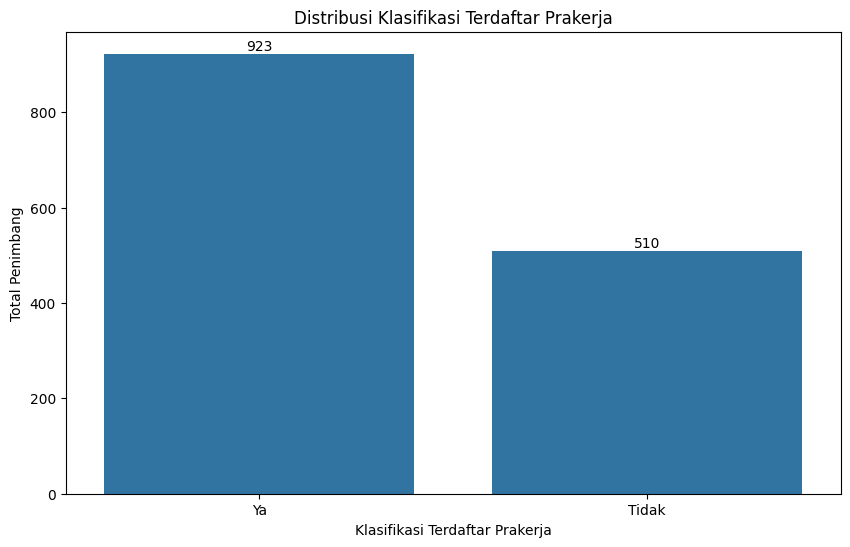

In [63]:
# Filter data untuk hanya menampilkan baris dengan penggunaan teknologi lainnya yang tidak "-"
data_filtered = data[data['terdaftar_prakerja'] != '0']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi penggunaan teknologi lainnya dengan bobot
segment_terdaftar_prakerja_weighted = data.groupby('terdaftar_prakerja').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_terdaftar_prakerja_weighted['terdaftar_prakerja'] = pd.Categorical(segment_terdaftar_prakerja_weighted['terdaftar_prakerja'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['terdaftar_prakerja'])
segment_terdaftar_prakerja_weighted = all_categories.merge(segment_terdaftar_prakerja_weighted, on='terdaftar_prakerja', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi penggunaan teknologi lainnya gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='terdaftar_prakerja', y='total_penimbang', data=segment_terdaftar_prakerja_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Terdaftar Prakerja')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Terdaftar Prakerja')
plt.show()


### Distribusi Klasifikasi Apakah Pernah Bekerja Sebelumnya, Pekerjaan, dan Alasan Berhenti

/tmp/ipython-input-3433395266.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_terdaftar_prakerja_weighted = data.groupby('kerja_sebelumnya').apply(


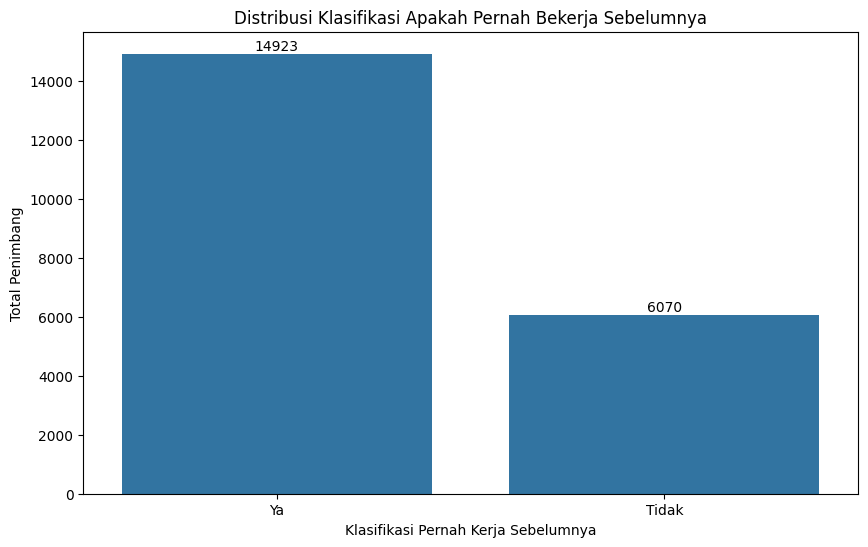

In [64]:
# Filter data untuk hanya menampilkan baris dengan penggunaan teknologi lainnya yang tidak "-"
data_filtered = data[data['kerja_sebelumnya'] != '0']

# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Ya', 'Tidak']

# Segmentasi berdasarkan klasifikasi penggunaan teknologi lainnya dengan bobot
segment_terdaftar_prakerja_weighted = data.groupby('kerja_sebelumnya').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_terdaftar_prakerja_weighted['kerja_sebelumnya'] = pd.Categorical(segment_terdaftar_prakerja_weighted['kerja_sebelumnya'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['kerja_sebelumnya'])
segment_terdaftar_prakerja_weighted = all_categories.merge(segment_terdaftar_prakerja_weighted, on='kerja_sebelumnya', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi penggunaan teknologi lainnya gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='kerja_sebelumnya', y='total_penimbang', data=segment_terdaftar_prakerja_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Apakah Pernah Bekerja Sebelumnya')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pernah Kerja Sebelumnya')
plt.show()


/tmp/ipython-input-4265115316.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_status_kerja_weighted = data_filtered.groupby('status_kerja').apply(


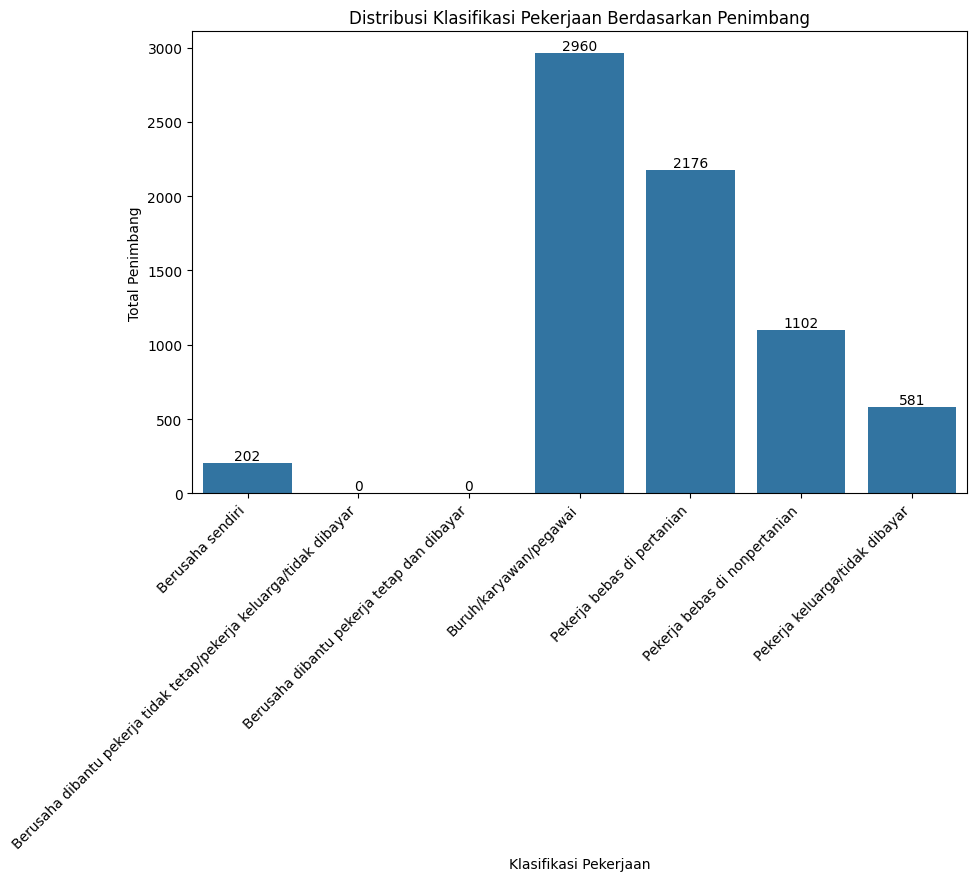

In [65]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = [
    'Berusaha sendiri',
    'Berusaha dibantu pekerja tidak tetap/pekerja keluarga/tidak dibayar',
    'Berusaha dibantu pekerja tetap dan dibayar',
    'Buruh/karyawan/pegawai',
    'Pekerja bebas di pertanian',
    'Pekerja bebas di nonpertanian',
    'Pekerja keluarga/tidak dibayar'
]

# Filter data to only include rows with valid 'status_kerja' categories
data_filtered = data[data['status_kerja'].isin(kategori_urutan)]

# Segmentasi berdasarkan klasifikasi alasan tidak mencari pekerjaan dalam seminggu terakhir dengan bobot
segment_status_kerja_weighted = data_filtered.groupby('status_kerja').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_status_kerja_weighted['status_kerja'] = pd.Categorical(segment_status_kerja_weighted['status_kerja'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['status_kerja'])
segment_status_kerja_weighted = all_categories.merge(segment_status_kerja_weighted, on='status_kerja', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi alasan tidak mencari pekerjaan dalam seminggu terakhir gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='status_kerja', y='total_penimbang', data=segment_status_kerja_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Pekerjaan Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pekerjaan')
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-1499733047.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_alasan_berhenti_kerja_weighted = data_filtered.groupby('alasan_berhenti_kerja').apply(


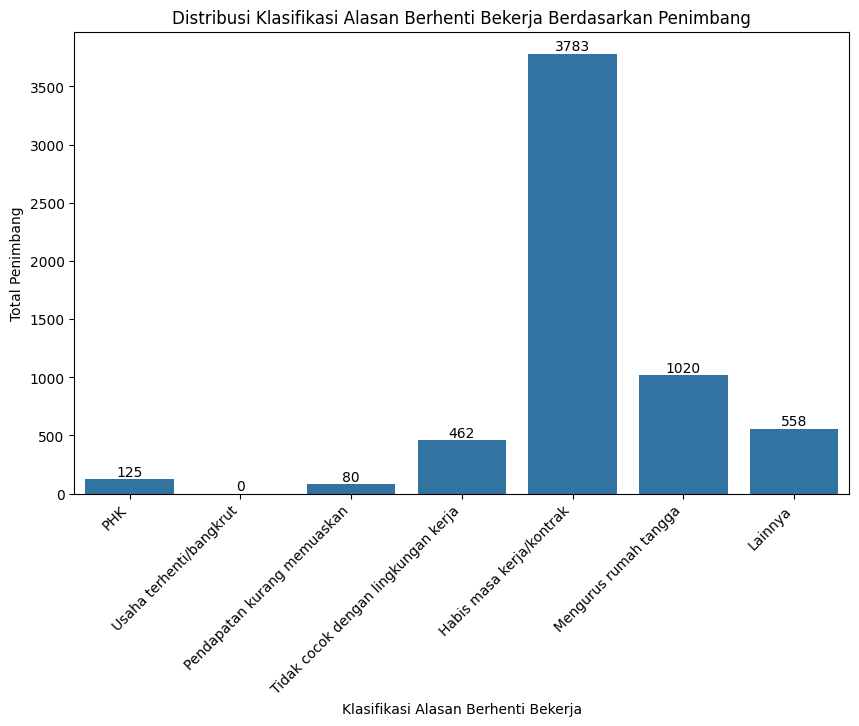

In [66]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = [
    'PHK',
    'Usaha terhenti/bangkrut',
    'Pendapatan kurang memuaskan',
    'Tidak cocok dengan lingkungan kerja',
    'Habis masa kerja/kontrak',
    'Mengurus rumah tangga',
    'Lainnya'
]

# Filter data to only include rows with valid 'alasan_berhenti_kerja' categories
data_filtered = data[data['alasan_berhenti_kerja'].isin(kategori_urutan)]

# Segmentasi berdasarkan klasifikasi alasan tidak mencari pekerjaan dalam seminggu terakhir dengan bobot
segment_alasan_berhenti_kerja_weighted = data_filtered.groupby('alasan_berhenti_kerja').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_alasan_berhenti_kerja_weighted['alasan_berhenti_kerja'] = pd.Categorical(segment_alasan_berhenti_kerja_weighted['alasan_berhenti_kerja'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['alasan_berhenti_kerja'])
segment_alasan_berhenti_kerja_weighted = all_categories.merge(segment_alasan_berhenti_kerja_weighted, on='alasan_berhenti_kerja', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi alasan tidak mencari pekerjaan dalam seminggu terakhir gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='alasan_berhenti_kerja', y='total_penimbang', data=segment_alasan_berhenti_kerja_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Alasan Berhenti Bekerja Berdasarkan Penimbang')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Alasan Berhenti Bekerja')
plt.xticks(rotation=45, ha="right")
plt.show()


## Visualisasi Data Per Tahun


### 2022

In [67]:
# Memfilter data untuk tahun 2022
data_2022 = data[data['tahun'] == 2022]

/tmp/ipython-input-3221399329.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_jenis_kelamin_weighted = data_2022.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


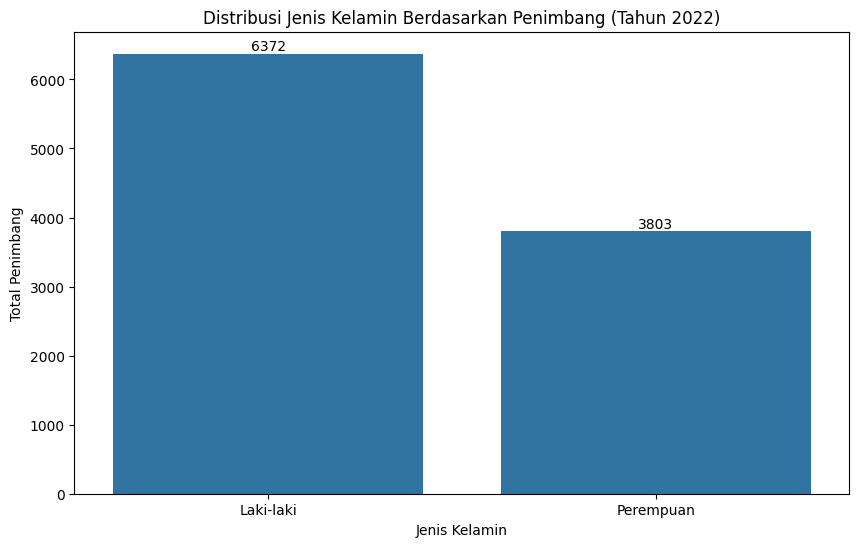

In [68]:
# Menghitung total penimbang berdasarkan jenis kelamin
segment_jenis_kelamin_weighted = data_2022.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='jenis_kelamin', y='total_penimbang', data=segment_jenis_kelamin_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Jenis Kelamin Berdasarkan Penimbang (Tahun 2022)')
plt.ylabel('Total Penimbang')
plt.xlabel('Jenis Kelamin')
plt.show()


/tmp/ipython-input-2753257759.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_status_perkawinan_weighted = data_2022.groupby('status_perkawinan').apply(


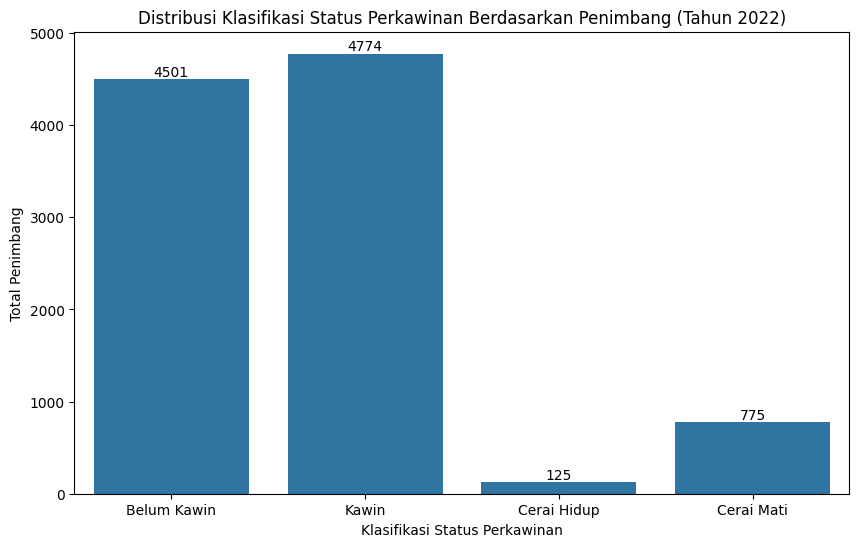

In [69]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Belum Kawin', 'Kawin', 'Cerai Hidup', 'Cerai Mati']

# Segmentasi berdasarkan klasifikasi status perkawinan dengan bobot
segment_status_perkawinan_weighted = data_2022.groupby('status_perkawinan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_status_perkawinan_weighted['status_perkawinan'] = pd.Categorical(segment_status_perkawinan_weighted['status_perkawinan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['status_perkawinan'])
segment_status_perkawinan_weighted = all_categories.merge(segment_status_perkawinan_weighted, on='status_perkawinan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi status perkawinan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='status_perkawinan', y='total_penimbang', data=segment_status_perkawinan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Status Perkawinan Berdasarkan Penimbang (Tahun 2022)')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Status Perkawinan')
plt.show()


/tmp/ipython-input-2466239937.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_pendidikan_tertinggi_weighted = data_2022.groupby('pendidikan_tertinggi').apply(


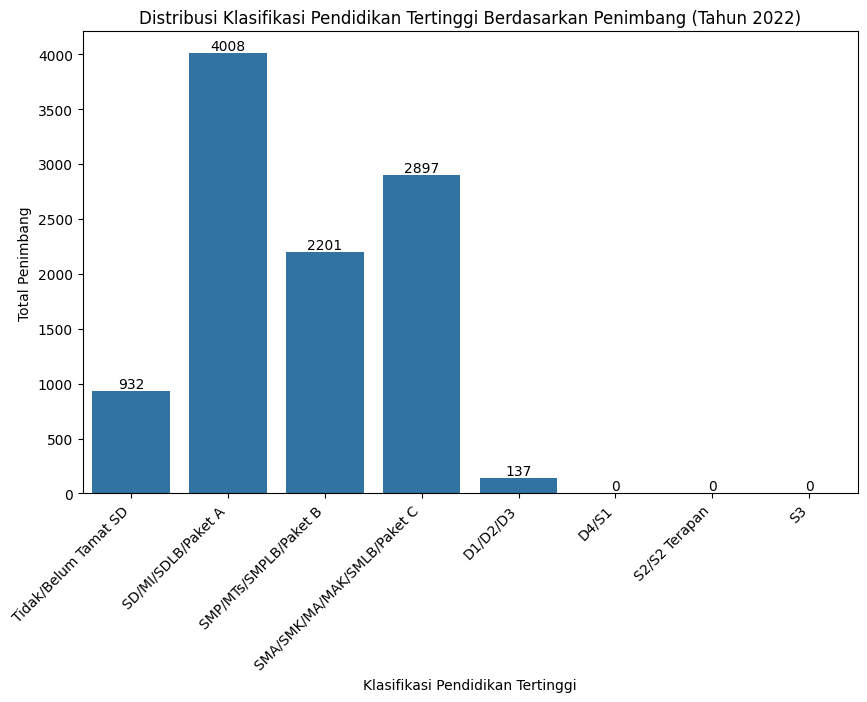

In [70]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Tidak/Belum Tamat SD', 'SD/MI/SDLB/Paket A', 'SMP/MTs/SMPLB/Paket B',
                   'SMA/SMK/MA/MAK/SMLB/Paket C', 'D1/D2/D3', 'D4/S1', 'S2/S2 Terapan', 'S3']

# Segmentasi berdasarkan klasifikasi pendidikan tertinggi dengan bobot
segment_pendidikan_tertinggi_weighted = data_2022.groupby('pendidikan_tertinggi').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'] = pd.Categorical(segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['pendidikan_tertinggi'])
segment_pendidikan_tertinggi_weighted = all_categories.merge(segment_pendidikan_tertinggi_weighted, on='pendidikan_tertinggi', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi pendidikan tertinggi gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pendidikan_tertinggi', y='total_penimbang', data=segment_pendidikan_tertinggi_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Pendidikan Tertinggi Berdasarkan Penimbang (Tahun 2022)')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pendidikan Tertinggi')
plt.xticks(rotation=45, ha="right")
plt.show()


### 2023

In [71]:
# Memfilter data untuk tahun 2023
data_2023 = data[data['tahun'] == 2023]

/tmp/ipython-input-2130843745.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_jenis_kelamin_weighted = data_2023.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


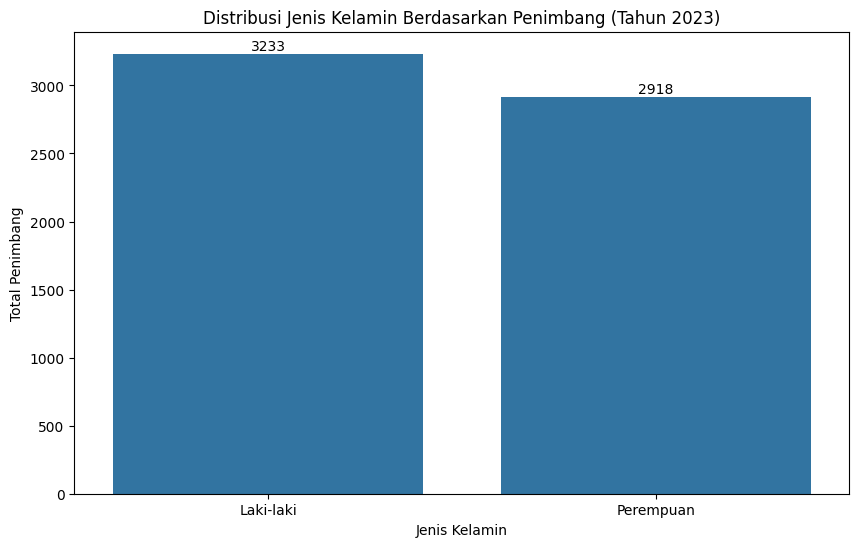

In [72]:
# Menghitung total penimbang berdasarkan jenis kelamin
segment_jenis_kelamin_weighted = data_2023.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='jenis_kelamin', y='total_penimbang', data=segment_jenis_kelamin_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Jenis Kelamin Berdasarkan Penimbang (Tahun 2023)')
plt.ylabel('Total Penimbang')
plt.xlabel('Jenis Kelamin')
plt.show()


/tmp/ipython-input-668585855.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_status_perkawinan_weighted = data_2023.groupby('status_perkawinan').apply(


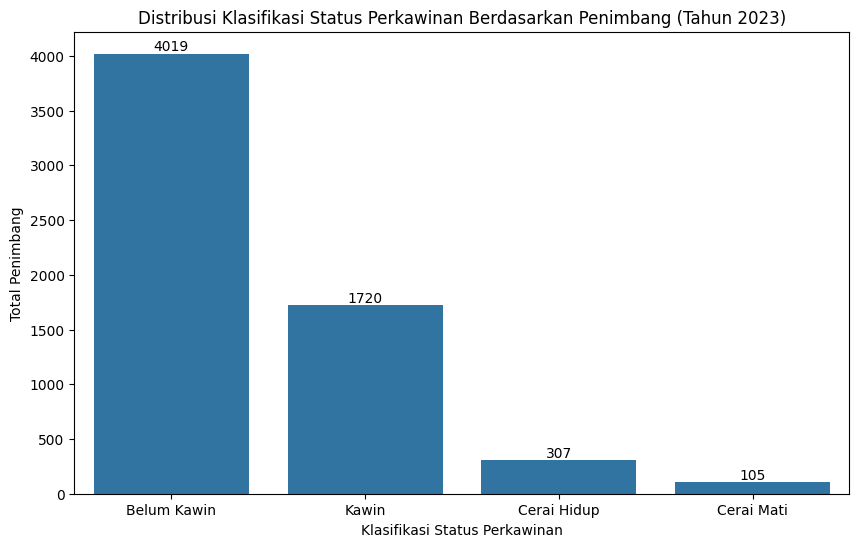

In [73]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Belum Kawin', 'Kawin', 'Cerai Hidup', 'Cerai Mati']

# Segmentasi berdasarkan klasifikasi status perkawinan dengan bobot
segment_status_perkawinan_weighted = data_2023.groupby('status_perkawinan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_status_perkawinan_weighted['status_perkawinan'] = pd.Categorical(segment_status_perkawinan_weighted['status_perkawinan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['status_perkawinan'])
segment_status_perkawinan_weighted = all_categories.merge(segment_status_perkawinan_weighted, on='status_perkawinan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi status perkawinan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='status_perkawinan', y='total_penimbang', data=segment_status_perkawinan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Status Perkawinan Berdasarkan Penimbang (Tahun 2023)')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Status Perkawinan')
plt.show()


/tmp/ipython-input-58600464.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_pendidikan_tertinggi_weighted = data_2023.groupby('pendidikan_tertinggi').apply(


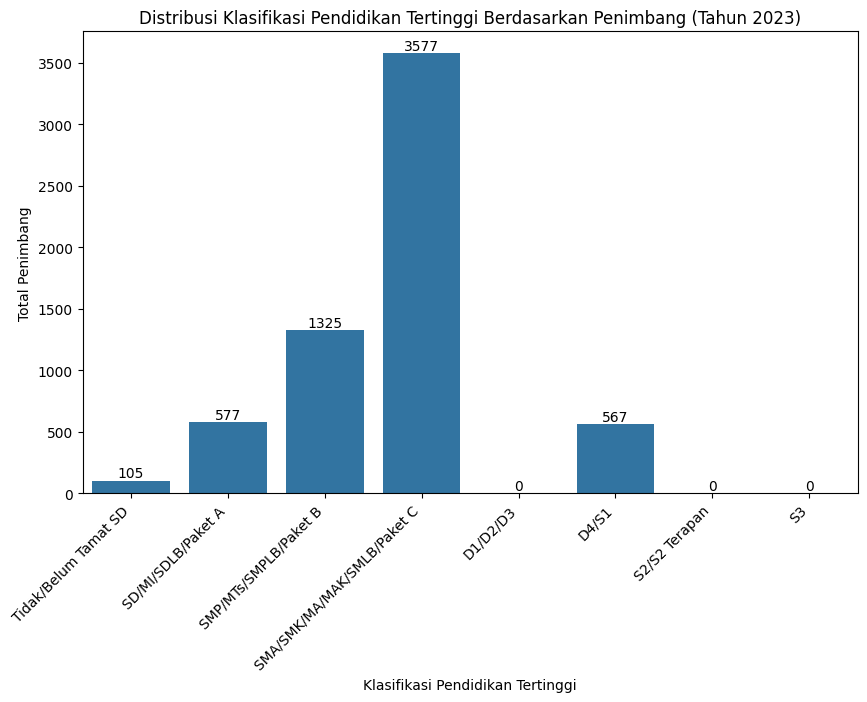

In [74]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Tidak/Belum Tamat SD', 'SD/MI/SDLB/Paket A', 'SMP/MTs/SMPLB/Paket B',
                   'SMA/SMK/MA/MAK/SMLB/Paket C', 'D1/D2/D3', 'D4/S1', 'S2/S2 Terapan', 'S3']

# Segmentasi berdasarkan klasifikasi pendidikan tertinggi dengan bobot
segment_pendidikan_tertinggi_weighted = data_2023.groupby('pendidikan_tertinggi').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'] = pd.Categorical(segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['pendidikan_tertinggi'])
segment_pendidikan_tertinggi_weighted = all_categories.merge(segment_pendidikan_tertinggi_weighted, on='pendidikan_tertinggi', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi pendidikan tertinggi gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pendidikan_tertinggi', y='total_penimbang', data=segment_pendidikan_tertinggi_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Pendidikan Tertinggi Berdasarkan Penimbang (Tahun 2023)')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pendidikan Tertinggi')
plt.xticks(rotation=45, ha="right")
plt.show()


### 2024

In [75]:
# Memfilter data untuk tahun 2024
data_2024 = data[data['tahun'] == 2024]

/tmp/ipython-input-2051278622.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_jenis_kelamin_weighted = data_2024.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')


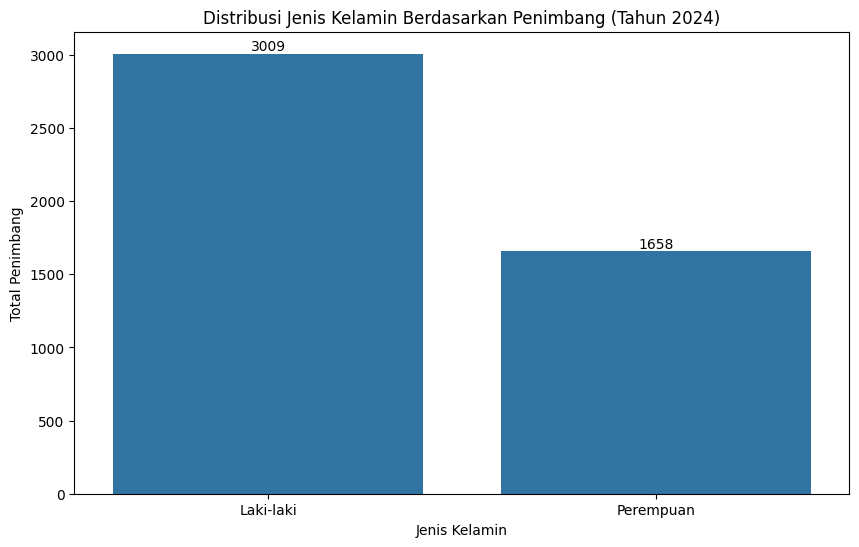

In [76]:
# Menghitung total penimbang berdasarkan jenis kelamin
segment_jenis_kelamin_weighted = data_2024.groupby('jenis_kelamin').apply(lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Membuat bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='jenis_kelamin', y='total_penimbang', data=segment_jenis_kelamin_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Jenis Kelamin Berdasarkan Penimbang (Tahun 2024)')
plt.ylabel('Total Penimbang')
plt.xlabel('Jenis Kelamin')
plt.show()


/tmp/ipython-input-3053092814.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_status_perkawinan_weighted = data_2024.groupby('status_perkawinan').apply(


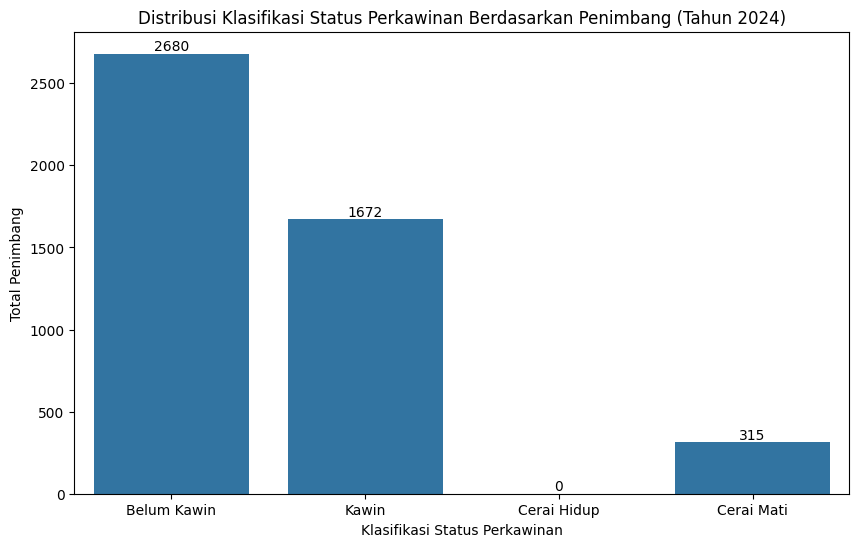

In [77]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Belum Kawin', 'Kawin', 'Cerai Hidup', 'Cerai Mati']

# Segmentasi berdasarkan klasifikasi status perkawinan dengan bobot
segment_status_perkawinan_weighted = data_2024.groupby('status_perkawinan').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_status_perkawinan_weighted['status_perkawinan'] = pd.Categorical(segment_status_perkawinan_weighted['status_perkawinan'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['status_perkawinan'])
segment_status_perkawinan_weighted = all_categories.merge(segment_status_perkawinan_weighted, on='status_perkawinan', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi status perkawinan gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='status_perkawinan', y='total_penimbang', data=segment_status_perkawinan_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Status Perkawinan Berdasarkan Penimbang (Tahun 2024)')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Status Perkawinan')
plt.show()


/tmp/ipython-input-2329203195.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_pendidikan_tertinggi_weighted = data_2024.groupby('pendidikan_tertinggi').apply(


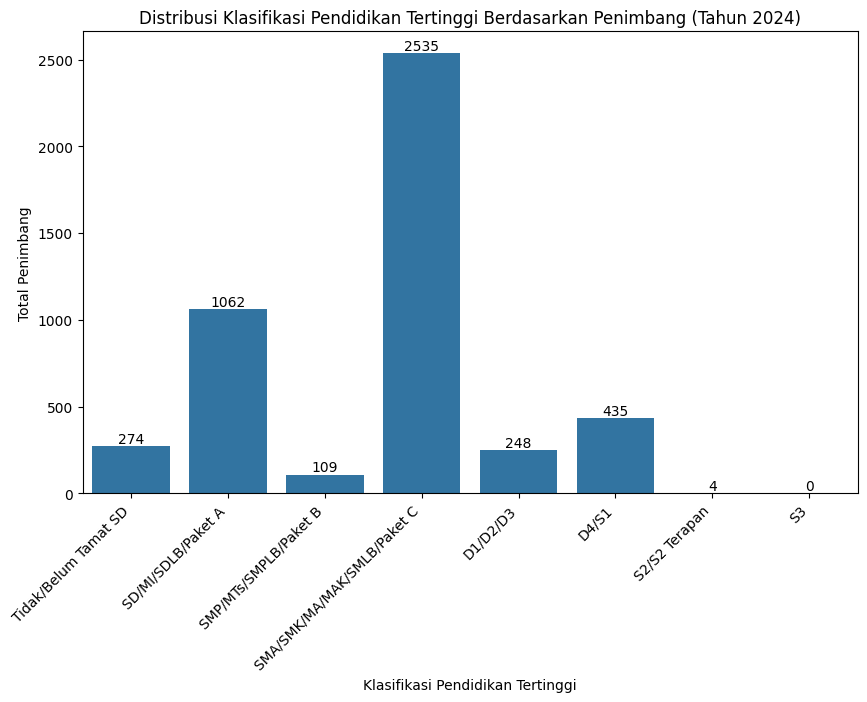

In [78]:
# Menentukan urutan kategori yang diinginkan
kategori_urutan = ['Tidak/Belum Tamat SD', 'SD/MI/SDLB/Paket A', 'SMP/MTs/SMPLB/Paket B',
                   'SMA/SMK/MA/MAK/SMLB/Paket C', 'D1/D2/D3', 'D4/S1', 'S2/S2 Terapan', 'S3']

# Segmentasi berdasarkan klasifikasi pendidikan tertinggi dengan bobot
segment_pendidikan_tertinggi_weighted = data_2024.groupby('pendidikan_tertinggi').apply(
    lambda x: (x['penimbang'] * 1).sum()).reset_index(name='total_penimbang')

# Mengurutkan berdasarkan urutan kategori yang telah ditentukan
segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'] = pd.Categorical(segment_pendidikan_tertinggi_weighted['pendidikan_tertinggi'], categories=kategori_urutan, ordered=True)

# Membuat DataFrame baru dengan semua kategori yang ada, termasuk yang tidak ada datanya (set total_penimbang=0)
all_categories = pd.DataFrame(kategori_urutan, columns=['pendidikan_tertinggi'])
segment_pendidikan_tertinggi_weighted = all_categories.merge(segment_pendidikan_tertinggi_weighted, on='pendidikan_tertinggi', how='left').fillna({'total_penimbang': 0})

# Membuat bar plot untuk distribusi pendidikan tertinggi gabungan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pendidikan_tertinggi', y='total_penimbang', data=segment_pendidikan_tertinggi_weighted)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Klasifikasi Pendidikan Tertinggi Berdasarkan Penimbang (Tahun 2024)')
plt.ylabel('Total Penimbang')
plt.xlabel('Klasifikasi Pendidikan Tertinggi')
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-1122685785.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_pengangguran_per_tahun = data.groupby('tahun').apply(lambda x: x['penimbang'].sum()).reset_index(name='total_pengangguran')


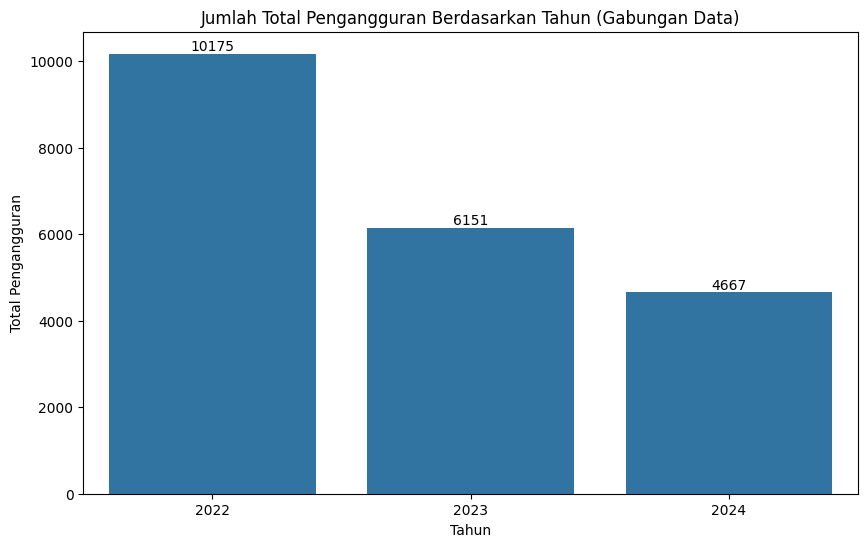

In [79]:
# Menghitung total pengangguran untuk setiap tahun berdasarkan kolom 'penimbang'
total_pengangguran_per_tahun = data.groupby('tahun').apply(lambda x: x['penimbang'].sum()).reset_index(name='total_pengangguran')

# Membuat bar plot untuk jumlah total pengangguran tiap tahun
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='tahun', y='total_pengangguran', data=total_pengangguran_per_tahun)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Jumlah Total Pengangguran Berdasarkan Tahun (Gabungan Data)')
plt.ylabel('Total Pengangguran')
plt.xlabel('Tahun')
plt.show()
